## **Daegu Apartement (Price Prediction)**

* **Name : Permadi Ilham Saputra**
* **Class : Job Connector Data Science**

### Contents

0. Initial Setup
1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

## 0. Initial Setup

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.base import BaseEstimator
class DummyEstimator(BaseEstimator):
    def fit(self): pass
    def score(self): pass

#Data Processing Libraries
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

#Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.subplots as sp

#Data Preprocessing Libraries
from sklearn.impute import SimpleImputer, KNNImputer  
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Data Modeling Libraries
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_log_error
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.compose import TransformedTargetRegressor
import time

## 1. Business Problem Understanding

* **Context**

Apartemen merupakan salah satu jawaban akan kebutuhan hunian bagi masyarakat modern karena keterbatasan lahan hunian dan padatnya aktivitas bisnis di perkotaan. Oleh karena itu, akan sangat menarik untuk meneliti harga apartemen yang dipengaruhi berbagai faktor internal dan eksternal. Faktor internal antara lain adalah tahun pembangunan (umur bangunan), fasilitas parkir, dan tipe apartemen. Sementara itu, faktor eksternal antara lain jarak ke fasilitas publik, universitas, maupun stasiun terdekat.

Penawaran (unit) apartemen biasa dilakukan oleh perseorangan maupun perusahaan. Para penawar bisa melakukan penjualan unit pada suatu platform dengan menentukan sendiri harga jual apartemen mereka. Hal ini tentu saja cukup menyulitkan bagi pemilik apartemen untuk menyesuaikan dengan harga pasaran. Jika harga terlalu tinggi dibandingkan dengan harga pasaran, tentu akan sulit untuk melakukan penjualan. Sebaliknya, jika terlalu rendah, tentu pemilik akan sulit untuk mendapatkan profit maksimal. 

* **Problem Statement**

Permintaan yang tinggi terhadap sewa apartment di kota Daegu menjadi tantangan bagi sebuah agen properti agar dapat bersaing dengan agen properti lainnya. Agar tetap dapat memperoleh customer yang loyal menjadi pelanggan dalam menyewa apartment, agen properti harus jeli dalam menentukan harga sewa yang sesuai dengan fasilitas dan fitur yang ditawarkan oleh sebuah unit apartment. Oleh karena itu dibutuhkan sebuah model yang dapat menjadi solusi untuk permasalahan tersebut, agar sebuah agen properti dapat menentukan harga sewa yang lebih kompetitif dan memudahkan untuk mencapai sales goal dan target.  

* **Goal**

Berdasarkan permasalahan tersebut, perlu dibangun sebuah model yang dapat memprediksi harga sewa apartemen berdasarkan data yang disediakan, yaitu model yang layak dengan tingkat pembelajaran model terbaik dengan tingkat kesalahan seminimal mungkin. Sehingga sebuah agen properti dapat menentukan harga yang sesuai untuk menyewakan apartemen mereka. Selain itu jika dilihat dari sisi pembeli apartemen mendapatkan harga sewa yang lebih kompetitif sehingga *customer satisfaction* akan semakin meningkat.

* **Analytic Approach**

Selanjutnya, untuk dapat menentukan harga sewa apartment yang tepat di kota Daegu. Kita akan melakukan analisa data untuk dapat menemukan pola dari fitur-fitur yang ada. Kita akan menggunakan fitur-fitur (semua informasi lain kecuali harga jual) pada data yang disediakan untuk memprediksi harga sewa setiap apartemen dengan menggunakan algoritma machine learning. Lalu, membangun sebuah model regresi yang akan membantu agen properti dalam menentukan harga sewa unit apartment.

* **Metric Evaluation**

Pada case ini Metric Evaluation yang akan digunakan untuk model regresi ini antara lain MSLE, MAE, MAPE, MSE.

## 2. Data Understanding

Attributes Information


| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| HallwayType  | object | Tipe Apartemen |
| TimeToSubway | object | Jarak Stasiun Terdekat (min)  |
| SubwayStation | object | Nama Stasiun Terdekat |
| N_FacilitiesNearBy(ETC) | float64 | Jumlah Fasilitas Terdekat |
| N_FacilitiesNearBy(Public Office) | float64 | Jumlah Kantor Pemerintah Terdekat |
| N_SchoolNearBy(University) | float64 | Jumlah Universitas Terdekat |
| N_Parkinglot(Basement) | float64 | Jumlah (Basemen) Lahan Parkir |
| YearBuilt | int64 | Tahun Pembangunan |
| N_FacilitiesInApt | int64 | Jumlah Fasilitas Apartment |
| Size(sqf) | int64 | Luas Apartment |
| SalePrice | int64 | Harga Jual Apartment (Won) |

<br>

Kita perlu menganalisis tipe data setiap kolom, sehingga dapat melakukan metode analisis yang tepat untuk data tersebut. Di bawah ini adalah daftar untuk setiap tipe data:

* **Data Numerical**
1. Discrete: N_FacilitiesNearBy(ETC), N_FacilitiesNearBy(PublicOffice), N_SchoolNearBy(University), N_Parkinglot(Basement), N_FacilitiesInApt
2. Continue: YearBuilt, Size(sqft), SalePrice

* **Data Categorical** 
1. Ordinal : TimeToSubway
2. Nominal : Hallway Type, SubwayStation

* **Data Datetime** : -



In [2]:
# Load Dataset
df= pd.read_csv('data_daegu_apartment.csv')
display(df.head(),df.tail())

HallwayType TimeToSubway          SubwayStation  N_FacilitiesNearBy(ETC)  \
0    terraced       0-5min  Kyungbuk_uni_hospital                      0.0   
1    terraced  10min~15min  Kyungbuk_uni_hospital                      1.0   
2       mixed  15min~20min       Chil-sung-market                      1.0   
3       mixed   5min~10min                Bangoge                      5.0   
4    terraced       0-5min                Sin-nam                      0.0   

   N_FacilitiesNearBy(PublicOffice)  N_SchoolNearBy(University)  \
0                               3.0                         2.0   
1                               5.0                         1.0   
2                               7.0                         3.0   
3                               5.0                         4.0   
4                               1.0                         2.0   

   N_Parkinglot(Basement)  YearBuilt  N_FacilitiesInApt  Size(sqf)  SalePrice  
0                  1270.0       2007                 10       1387     346017  
1                     0.0       1986                  4        914     150442  
2                    56.0       1997                  5        558      61946  
3                   798.0       2005                  7        914     165486  
4                   536.0       2006                  5       1743     311504

HallwayType TimeToSubway          SubwayStation  N_FacilitiesNearBy(ETC)  \
4118    terraced       0-5min                Sin-nam                      0.0   
4119       mixed  15min~20min              Myung-duk                      5.0   
4120       mixed  15min~20min              Myung-duk                      5.0   
4121    corridor   5min~10min                  Daegu                      2.0   
4122    terraced       0-5min  Kyungbuk_uni_hospital                      0.0   

      N_FacilitiesNearBy(PublicOffice)  N_SchoolNearBy(University)  \
4118                               3.0                         2.0   
4119                               6.0                         5.0   
4120                               6.0                         5.0   
4121                               5.0                         0.0   
4122                               3.0                         2.0   

      N_Parkinglot(Basement)  YearBuilt  N_FacilitiesInApt  Size(sqf)  \
4118                   475.0       2008                  8        914   
4119                   536.0       1993                  4       1451   
4120                   536.0       1993                  4       1761   
4121                    76.0       1985                  3        676   
4122                  1270.0       2007                 10        868   

      SalePrice  
4118     323008  
4119     242477  
4120     168141  
4121      73451  
4122     250442

In [3]:
# Check data type, null values, unique values

print(f'The number of rows and columns : {df.shape}')

pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    'neg_value': [True if df[col].dtype == int and (df[col] < 0).any() else False for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

The number of rows and columns : (4123, 11)


feature data_type  null_value  neg_value  \
0                        HallwayType    object         0.0      False   
1                       TimeToSubway    object         0.0      False   
2                      SubwayStation    object         0.0      False   
3            N_FacilitiesNearBy(ETC)   float64         0.0      False   
4   N_FacilitiesNearBy(PublicOffice)   float64         0.0      False   
5         N_SchoolNearBy(University)   float64         0.0      False   
6             N_Parkinglot(Basement)   float64         0.0      False   
7                          YearBuilt     int64         0.0      False   
8                  N_FacilitiesInApt     int64         0.0      False   
9                          Size(sqf)     int64         0.0      False   
10                         SalePrice     int64         0.0      False   

    n_unique                                      sample_unique  
0          3                        [terraced, mixed, corridor]  
1          5  [0-5min, 10min~15min, 15min~20min, 5min~10min,...  
2          8  [Kyungbuk_uni_hospital, Chil-sung-market, Bang...  
3          4                               [0.0, 1.0, 5.0, 2.0]  
4          8           [3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]  
5          6                     [2.0, 1.0, 3.0, 4.0, 5.0, 0.0]  
6         20  [1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0...  
7         16  [2007, 1986, 1997, 2005, 2006, 2009, 2014, 199...  
8          9                       [10, 4, 5, 7, 2, 9, 8, 1, 3]  
9         89  [1387, 914, 558, 1743, 1334, 572, 910, 288, 11...  
10       838  [346017, 150442, 61946, 165486, 311504, 118584...

* #### Mengubah Column Name

Agar menjadi lebih mudah dalam melakukan pengolahan data untuk proses pemodelan, dilakukan penggantian nama kolom dengan nama yang lebih ringkas.

| Old Column Name | New Column Name |
| --- | --- |
| Hallway Type | Hallway_Type |
| TimeToSubway | Time_To_Subway |
| SubwayStation | Subway_Station |
| N_FacilitiesNearBy(ETC) | ETCFacilities_Nearby |
| N_FacilitiesNearBy(PublicOffice) | PublicOffice_Nearby |
| N_SchoolNearBy(University) | University_Nearby |
| N_Parkinglot(Basement) | Basement_Parking |
| YearBuilt | Year_Built |
| N_FacilitiesInApt | Apt_Facilities |
| Size(sqf) | Size_Sqf |
| SalePrice | Sale_Price |


In [4]:
# change columns name for easy processing

mylabels = {'HallwayType' : 'Hallway_Type',
            'TimeToSubway' : 'Time_To_Subway',
            'SubwayStation' : 'Subway_Station',
            'N_FacilitiesNearBy(ETC)':'ETCFacilities_Nearby',
            'N_FacilitiesNearBy(PublicOffice)' : 'PublicOffice_Nearby',
            "N_SchoolNearBy(University)":"University_Nearby",
            "N_Parkinglot(Basement)": "Basement_Parking",
            "YearBuilt" : "Year_Built",
            "N_FacilitiesInApt" : "Apt_Facilities",
            "Size(sqf)" : "Size_Sqf",
            "SalePrice" : "Sale_Price",
            }
df.rename(index = str, columns = mylabels, inplace = True)
df

Hallway_Type Time_To_Subway         Subway_Station  ETCFacilities_Nearby  \
0        terraced         0-5min  Kyungbuk_uni_hospital                   0.0   
1        terraced    10min~15min  Kyungbuk_uni_hospital                   1.0   
2           mixed    15min~20min       Chil-sung-market                   1.0   
3           mixed     5min~10min                Bangoge                   5.0   
4        terraced         0-5min                Sin-nam                   0.0   
...           ...            ...                    ...                   ...   
4118     terraced         0-5min                Sin-nam                   0.0   
4119        mixed    15min~20min              Myung-duk                   5.0   
4120        mixed    15min~20min              Myung-duk                   5.0   
4121     corridor     5min~10min                  Daegu                   2.0   
4122     terraced         0-5min  Kyungbuk_uni_hospital                   0.0   

      PublicOffice_Nearby  University_Nearby  Basement_Parking  Year_Built  \
0                     3.0                2.0            1270.0        2007   
1                     5.0                1.0               0.0        1986   
2                     7.0                3.0              56.0        1997   
3                     5.0                4.0             798.0        2005   
4                     1.0                2.0             536.0        2006   
...                   ...                ...               ...         ...   
4118                  3.0                2.0             475.0        2008   
4119                  6.0                5.0             536.0        1993   
4120                  6.0                5.0             536.0        1993   
4121                  5.0                0.0              76.0        1985   
4122                  3.0                2.0            1270.0        2007   

      Apt_Facilities  Size_Sqf  Sale_Price  
0                 10      1387      346017  
1                  4       914      150442  
2                  5       558       61946  
3                  7       914      165486  
4                  5      1743      311504  
...              ...       ...         ...  
4118               8       914      323008  
4119               4      1451      242477  
4120               4      1761      168141  
4121               3       676       73451  
4122              10       868      250442  

[4123 rows x 11 columns]

* #### EDA (Explanatory Data Analysis)

In [3]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
category_features = ['Hallway_Type', 'Time_To_Subway', 'Subway_Station']
numerical_features = ['ETCFacilities_Nearby', 'PublicOffice_Nearby', 'University_Nearby', 'Basement_Parking', 'Apt_Facilities', 'Size_Sqf', 'Year_Built']

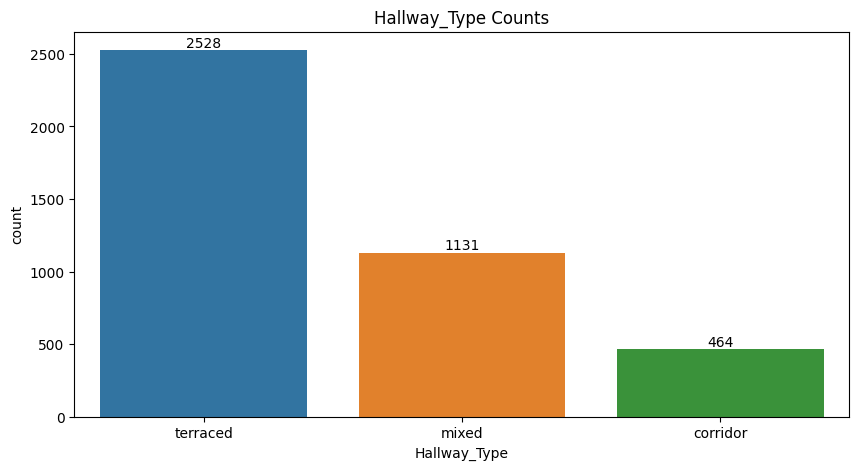

In [6]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Hallway_Type', data=df)
plt.title('Hallway_Type Counts')

# Annotate the bars with their respective counts
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'top', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

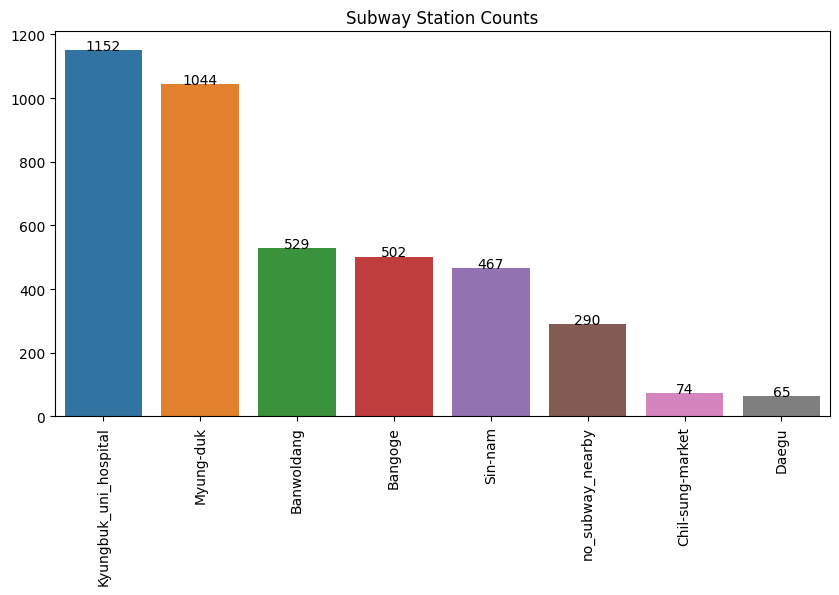

In [7]:
plt.figure(figsize=(10,5))

# Sort the values before plotting
df_sorted = df['Subway_Station'].value_counts().sort_values(ascending=False)

ax = sns.barplot(x=df_sorted.index, y=df_sorted.values)
plt.title('Subway Station Counts')

# Annotate the bars with their respective counts
for i, v in enumerate(df_sorted.values):
    ax.text(i, v + 0.2, str(v), ha = 'center')

# Make the labels on the x-axis vertical
plt.xticks(rotation='vertical')

plt.show()


In [8]:
#value counts check in column time to subway
df['Time_To_Subway'].value_counts()

0-5min                1953
5min~10min             787
15min~20min            629
10min~15min            583
no_bus_stop_nearby     171
Name: Time_To_Subway, dtype: int64

Pada kolom **Time_To_Subway** terdapat perbedaan penulisan format yang berbeda. Agar lebih rapi dan menggunakan tanda penghubung yang tepat, kita ubah tanda **"~"** menjadi tanda **"-"**.

In [9]:
# Mengubah format penulisan tanda penghubung pada kolom Time_To_Subway

df.loc[df['Time_To_Subway'] == '5min~10min', 'Time_To_Subway']='5min-10min'
df.loc[df['Time_To_Subway'] == '10min~15min', 'Time_To_Subway']='10min-15min'
df.loc[df['Time_To_Subway'] == '15min~20min', 'Time_To_Subway']='15min-20min'

In [10]:
#value counts check in column time to subway
df['Time_To_Subway'].value_counts()

0-5min                1953
5min-10min             787
15min-20min            629
10min-15min            583
no_bus_stop_nearby     171
Name: Time_To_Subway, dtype: int64

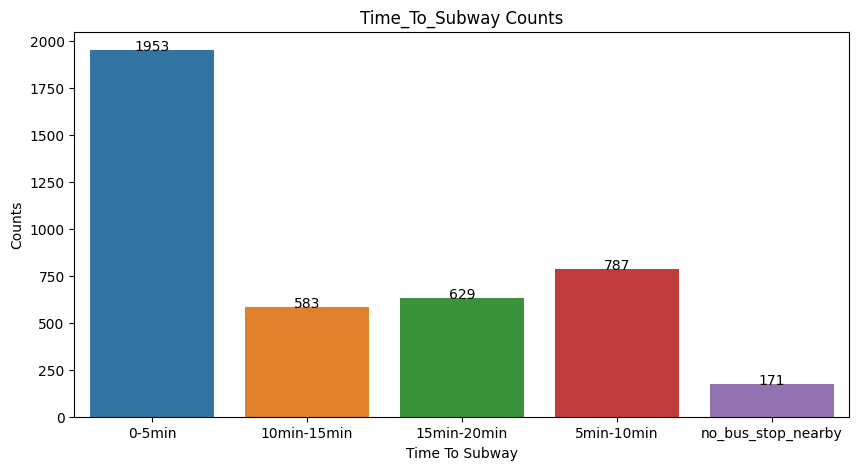

In [11]:
plt.figure(figsize=(10,5))

# Get the counts of each unique value in the 'Time_To_Subway' column and sort in descending order
df_sorted = df['Time_To_Subway'].value_counts().sort_index(ascending=True)

ax = sns.barplot(x=df_sorted.index, y=df_sorted.values)
plt.title('Time_To_Subway Counts')

# Add labels to the x and y axes
plt.xlabel('Time To Subway')
plt.ylabel('Counts')

# Annotate the bars with their respective counts
for i, v in enumerate(df_sorted.values):
    ax.text(i, v + 0.2, str(v), ha = 'center')

plt.show()

### 3. Data Preprocessing

* #### Check & Handling Outliers Data

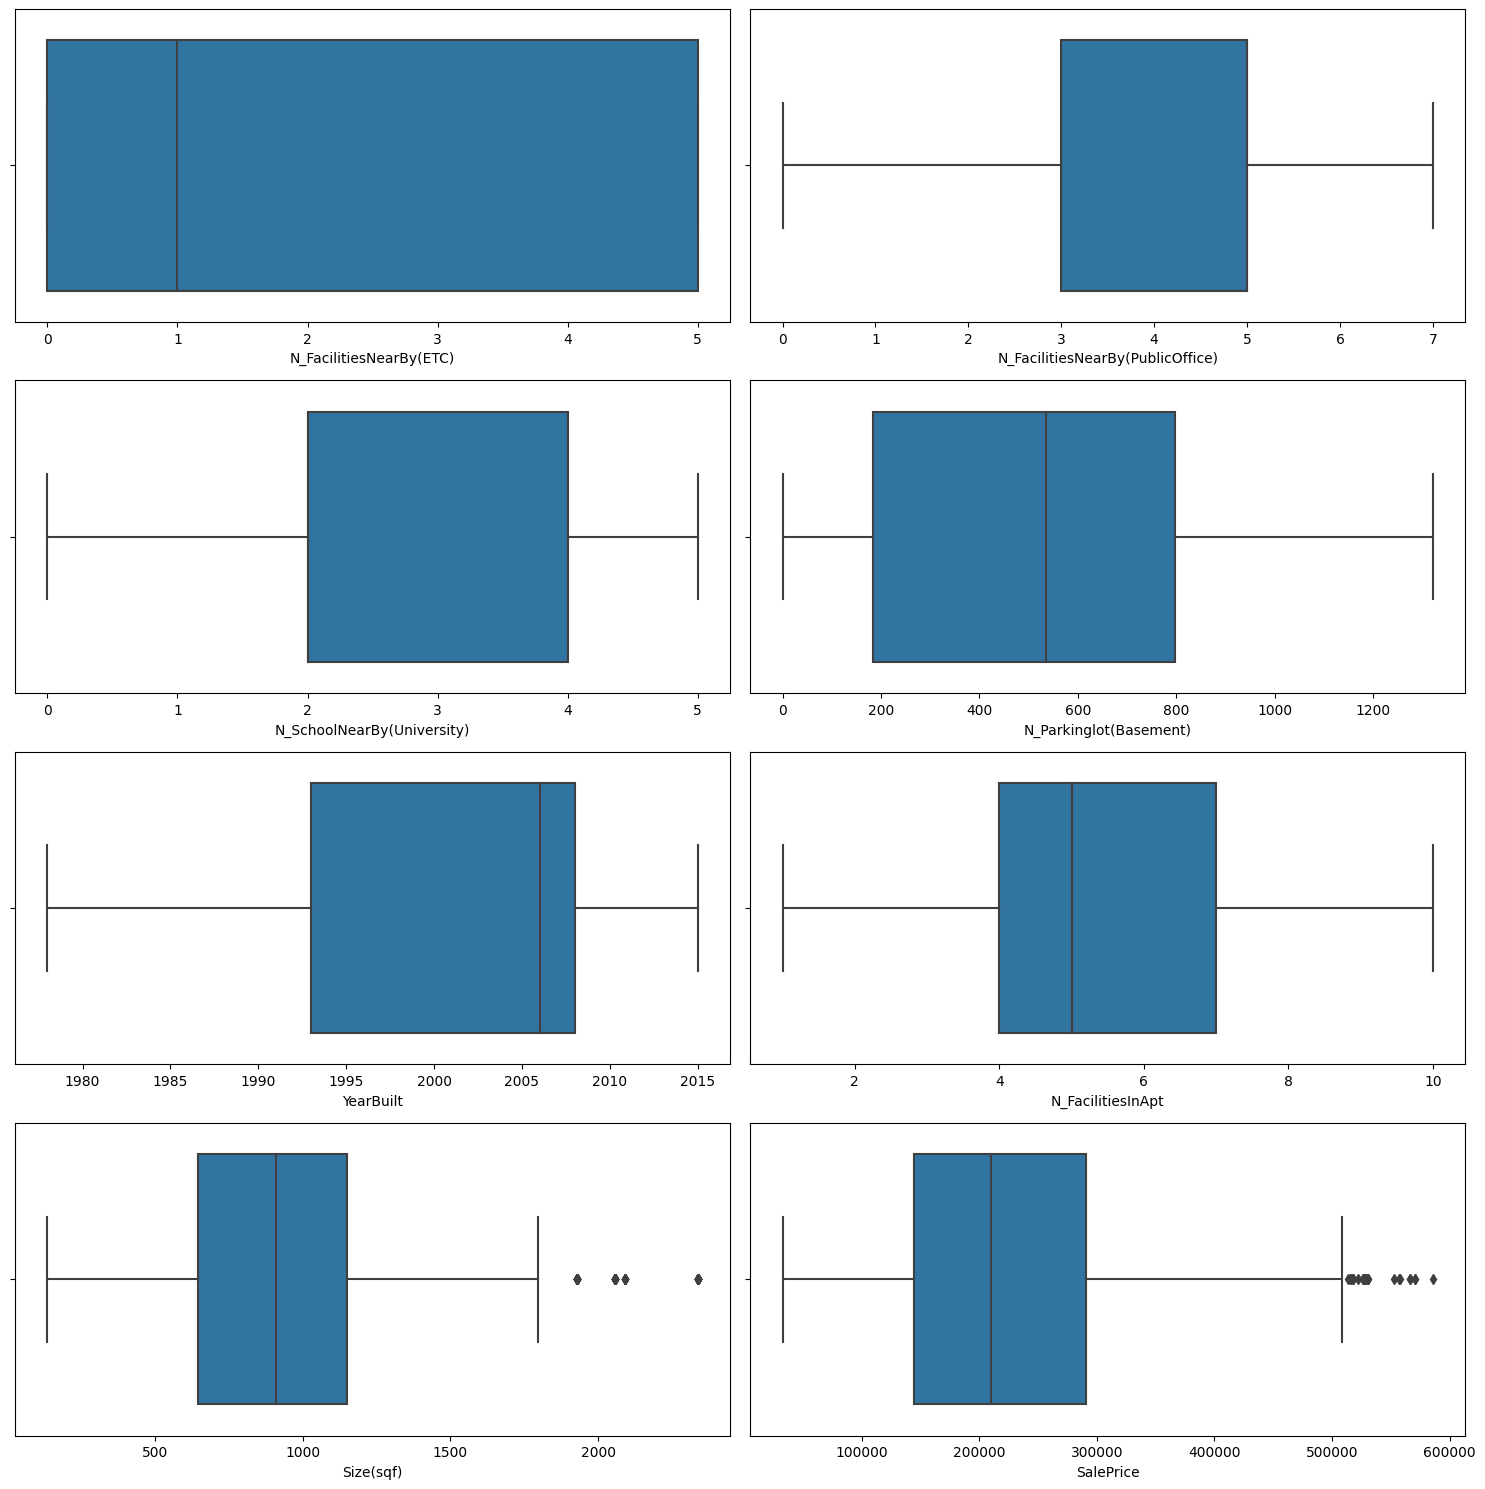

In [8]:
fig, axes = plt.subplots(4, 2, figsize=(15, 15))

# Get the numerical columns from your DataFrame
numerical_columns = df.select_dtypes(include=[np.number]).columns[:8]

for i, column in enumerate(numerical_columns):
    row = i // 2
    col = i % 2
    sns.boxplot(ax=axes[row, col], x=df[column])

plt.tight_layout()
plt.show()

Dari visualisasi diatas terlihat bahwa terdapat 2 kolom yang memiliki outlier yaitu kolom Size_Sqf dan Sale_Price, pada tahap selanjutnya outlier tersebut akan dilakukan handling dengan tujuan agar prediksi semakin bagus.

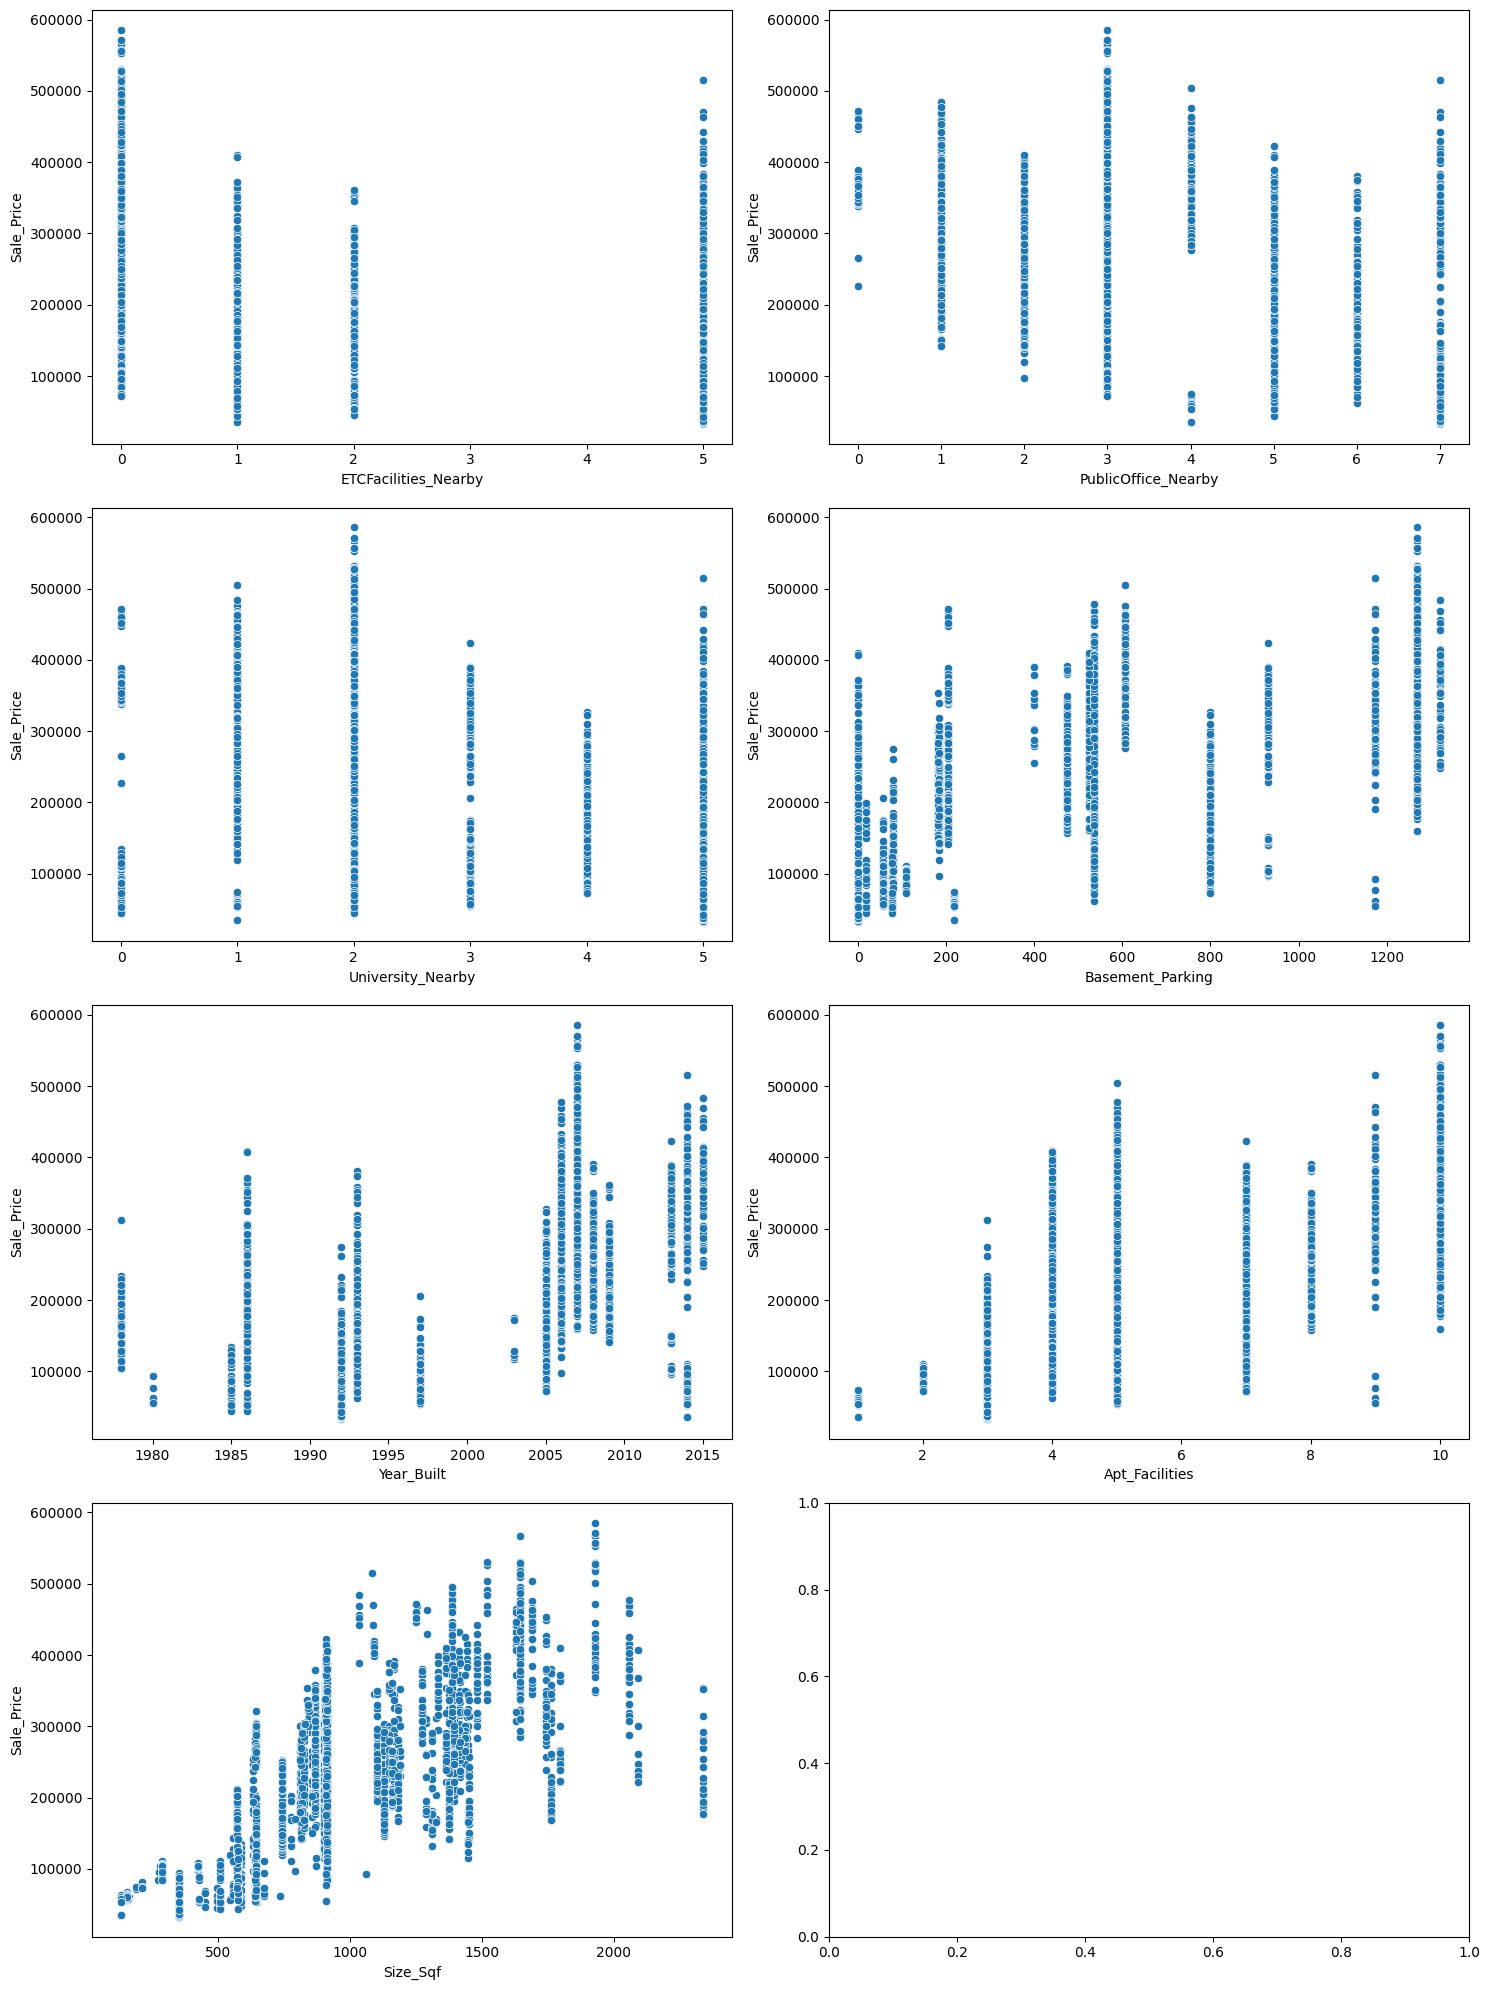

In [13]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

# Get the numerical columns from your DataFrame
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Remove 'Sale_Price' from the list of numerical columns
numerical_columns = [col for col in numerical_columns if col != 'Sale_Price']

# Select the first 8 numerical columns
numerical_columns = numerical_columns[:8]

for i, column in enumerate(numerical_columns):
    row = i // 2
    col = i % 2
    sns.scatterplot(ax=axes[row, col], x=df[column], y=df['Sale_Price'])

plt.tight_layout()
plt.show()

Pada dataset **"data_daegu_apartment"** ini terdapat 2 kolom yang terdapat data outlier yaitu **Size_Sqf** dan **Sale_Price**, karena untuk setiap prediksi dari model yang masih mempunyai data outliers akan bernilai menjadi bias. Oleh karena itu perlu dilakukan handling data outliers pada kedua kolom **Size_Sqf** dan **Sale_Price** dengan mempertimbangkan kombinasi antara hasil dari metode IQR dan juga domain knowledge. Nantinya, model yang dihasilkan hanya terbatas dapat memprediksi listing baru yang nilai-nilainya pada rentang data berdasarkan dataset yang sudah clean. 

#### Handling Outliers Pada Kolom Size_Sqf

**Distribution Plot of Daegu Apartment Size (Size_Sqf)**

Pertama kita check terlebih dahulu untuk pola distribusi dan kolom mana saja yang mempunyai data outliers berdasarkan upperbound/ batas atas dari data Size_Sqf (Size Apartment).

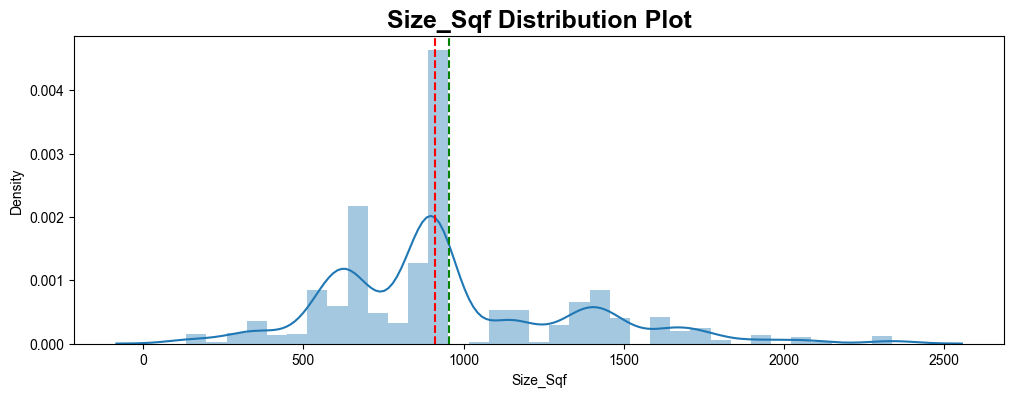

In [14]:
plt.figure(figsize=(12, 4))
sns.distplot(df['Size_Sqf'])
sns.set(font_scale=1.2)
plt.title('Size_Sqf Distribution Plot', size=18, weight='bold')
plt.axvline(df["Size_Sqf"].median() #The median line
            , linestyle="--",
            color="red")
plt.axvline(df["Size_Sqf"].mean() #The mean line
            , linestyle="--",
            color="green")

Berdasar dari plot grafik kolom Size_Sqf, plotting median dan mean dapat disimpulkan bahwa data Size_Sqf tidak terdistribusi normal. Dengan pola distribusi Sckewed Right, oleh karena itu perlu dilakukan handling data pada kolom Size_Sqf ini.

In [15]:
# Calculate for each quantile of Size_Sqf to replace the outliers in the "Size_Sqf" column.

q1_size = np.percentile (df['Size_Sqf'], 25, interpolation='midpoint')
q2_size = np.percentile (df['Size_Sqf'], 50, interpolation='midpoint')
q3_size = np.percentile (df['Size_Sqf'], 75, interpolation='midpoint')

iqr_size = (q3_size - q1_size)

lowerbound_size = q1_size - (1.5 *iqr_size)
upperbound_size = q3_size + (1.5 *iqr_size)

outliersSize = df['Size_Sqf'][df['Size_Sqf'] > upperbound_size].count()
outliersPercent_Size = outliersSize  / len(df) * 100

print (f'Q1 quantile of the Size_Sqf : {q1_size}')
print (f'Q2 quantile of the Size_Sqf : {q2_size}')
print (f'Q3 quantile of the Size_Sqf : {q3_size}')
print (f'IQR of Size_Sqf : {iqr_size}')
print (f'Lower Outliers Limit of Size_Sqf : {lowerbound_size}')
print (f'Upper Outliers Limit of Size_Sqf : {upperbound_size}')  
print (f"Amount of outliers Size_Sqf: {outliersSize}")
print (f"Percentage of outliers Size_Sqf: {outliersPercent_Size.round(2)}%")

Q1 quantile of the Size_Sqf : 644.0
Q2 quantile of the Size_Sqf : 910.0
Q3 quantile of the Size_Sqf : 1149.0
IQR of Size_Sqf : 505.0
Lower Outliers Limit of Size_Sqf : -113.5
Upper Outliers Limit of Size_Sqf : 1906.5
Amount of outliers Size_Sqf: 98
Percentage of outliers Size_Sqf: 2.38%


In [16]:
# Check the data of Income column that have value higher that upperbound, we call it as outliers

sizeOutliers = df.loc[df['Size_Sqf'] >= upperbound_size].sort_values(["Sale_Price"],ascending=False)
sizeOutliers

Hallway_Type Time_To_Subway         Subway_Station  ETCFacilities_Nearby  \
2128     terraced         0-5min  Kyungbuk_uni_hospital                   0.0   
2918     terraced         0-5min  Kyungbuk_uni_hospital                   0.0   
550      terraced         0-5min  Kyungbuk_uni_hospital                   0.0   
234      terraced         0-5min  Kyungbuk_uni_hospital                   0.0   
3545     terraced         0-5min  Kyungbuk_uni_hospital                   0.0   
...           ...            ...                    ...                   ...   
4027        mixed    15min-20min              Myung-duk                   5.0   
2621        mixed    15min-20min              Myung-duk                   5.0   
493         mixed    15min-20min              Myung-duk                   5.0   
2045        mixed    15min-20min              Myung-duk                   5.0   
2120        mixed    15min-20min              Myung-duk                   5.0   

      PublicOffice_Nearby  University_Nearby  Basement_Parking  Year_Built  \
2128                  3.0                2.0            1270.0        2007   
2918                  3.0                2.0            1270.0        2007   
550                   3.0                2.0            1270.0        2007   
234                   3.0                2.0            1270.0        2007   
3545                  3.0                2.0            1270.0        2007   
...                   ...                ...               ...         ...   
4027                  6.0                5.0             536.0        1993   
2621                  6.0                5.0             536.0        1993   
493                   6.0                5.0             536.0        1993   
2045                  6.0                5.0             536.0        1993   
2120                  6.0                5.0             536.0        1993   

      Apt_Facilities  Size_Sqf  Sale_Price  
2128              10      1928      585840  
2918              10      1928      570796  
550               10      1928      570796  
234               10      1928      566371  
3545              10      1928      557522  
...              ...       ...         ...  
4027               4      2337      193805  
2621               4      2337      190265  
493                4      2337      190265  
2045               4      2337      185840  
2120               4      2337      176991  

[98 rows x 11 columns]

In [17]:
# Drop data outlier pada 'Size_Sqf'
df = df[df['Size_Sqf'] <= upperbound_size]

In [18]:
# Check the data of Income column that have value higher that upperbound

sizeOutliers = df.loc[df['Size_Sqf'] >= upperbound_size].sort_values(["Size_Sqf"],ascending=False)
sizeOutliers

Empty DataFrame
Columns: [Hallway_Type, Time_To_Subway, Subway_Station, ETCFacilities_Nearby, PublicOffice_Nearby, University_Nearby, Basement_Parking, Year_Built, Apt_Facilities, Size_Sqf, Sale_Price]
Index: []

Sudah tidak terdapat nilai dari Size_Sqf yang mempunyai nilai Outliers.

#### Handling Outliers Pada Kolom Sale_Price

**Distribution Plot of Daegu Apartment Price (Sale_Price)**

Selanjutnya terdapat kolom Sale_Price terdapat data outliersnya, Akan kita check terlebih dahulu untuk pola distribusi dan kolom mana saja yang mempunyai data outliers berdasarkan upperbound/ batas atas dari data Sale_Price.

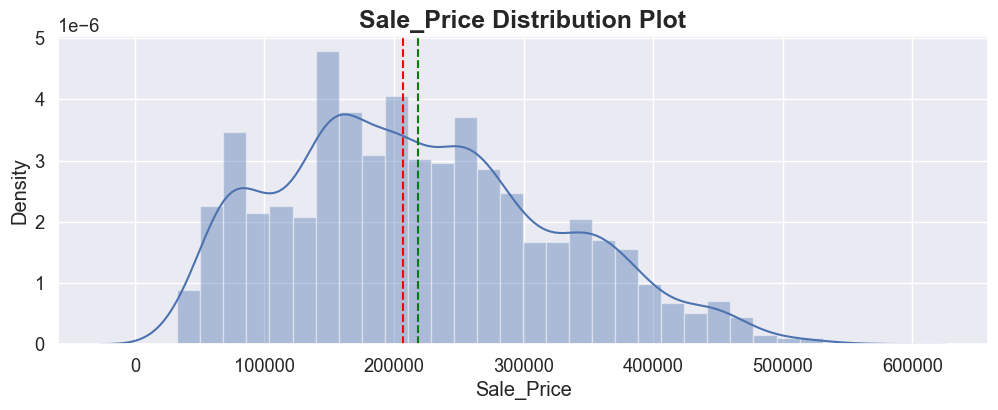

In [19]:
plt.figure(figsize=(12, 4))
sns.distplot(df['Sale_Price'])
sns.set(font_scale=1.2)
plt.title('Sale_Price Distribution Plot', size=18, weight='bold')
plt.axvline(df["Sale_Price"].median() #The median line
            , linestyle="--",
            color="red")
plt.axvline(df["Sale_Price"].mean() #The mean line
            , linestyle="--",
            color="green")

Berdasar dari plot grafik kolom Sale_Price, plotting median dan mean dapat disimpulkan bahwa data Sale_Price tidak terdistribusi normal. Dengan pola distribusi Sckewed Right.

In [20]:
# Calculate for each quantile of Size_Sqf to replace the outliers in the "Size_Sqf" column.

q1_price = np.percentile (df['Sale_Price'], 25, interpolation='midpoint')
q2_price = np.percentile (df['Sale_Price'], 50, interpolation='midpoint')
q3_price = np.percentile (df['Sale_Price'], 75, interpolation='midpoint')

iqr_price = (q3_price - q1_price)

lowerbound_price = q1_price - (1.5 *iqr_price)
upperbound_price = q3_price + (1.5 *iqr_price)

outliersPrice = df['Sale_Price'][df['Sale_Price'] > upperbound_price].count()
outliersPercent_Price = outliersPrice  / len(df) * 100

print (f'Q1 quantile of the Sale_Price : {q1_price}')
print (f'Q2 quantile of the Sale_Price : {q2_price}')
print (f'Q3 quantile of the Sale_Price : {q3_price}')
print (f'IQR of Sale_Price : {iqr_price}')
print (f'Lower Outliers Limit of Sale_Price : {lowerbound_price}')
print (f'Upper Outliers Limit of Sale_Price : {upperbound_price}')  
print (f"Amount of outliers: {outliersPrice}")
print (f"Percentage of outliers: {outliersPercent_Price.round(2)}%")

Q1 quantile of the Sale_Price : 143389.0
Q2 quantile of the Sale_Price : 207079.0
Q3 quantile of the Sale_Price : 286902.0
IQR of Sale_Price : 143513.0
Lower Outliers Limit of Sale_Price : -71880.5
Upper Outliers Limit of Sale_Price : 502171.5
Amount of outliers: 13
Percentage of outliers: 0.32%


Terdapat 13 rows yang mempunyai nilai Sale_Price yang melebihi batas atas (upperbound) dan menjadi outliers dari Sale_Price. Ke 13 outliers tersebut jika dihitung sebagai percentage kesuluruhan data adalah 0.32 % data. Namun karena Sale_Price adalah target dari pemodelan ini, sehingga tidak perlu dilakukan data drop pada Outliers Sale_Price. Karena tidak akan terlalu berpengaruh terhadap hasil pemodelan.

Kita lihat kembali boxplotnya setelah dilakukan handling outlier

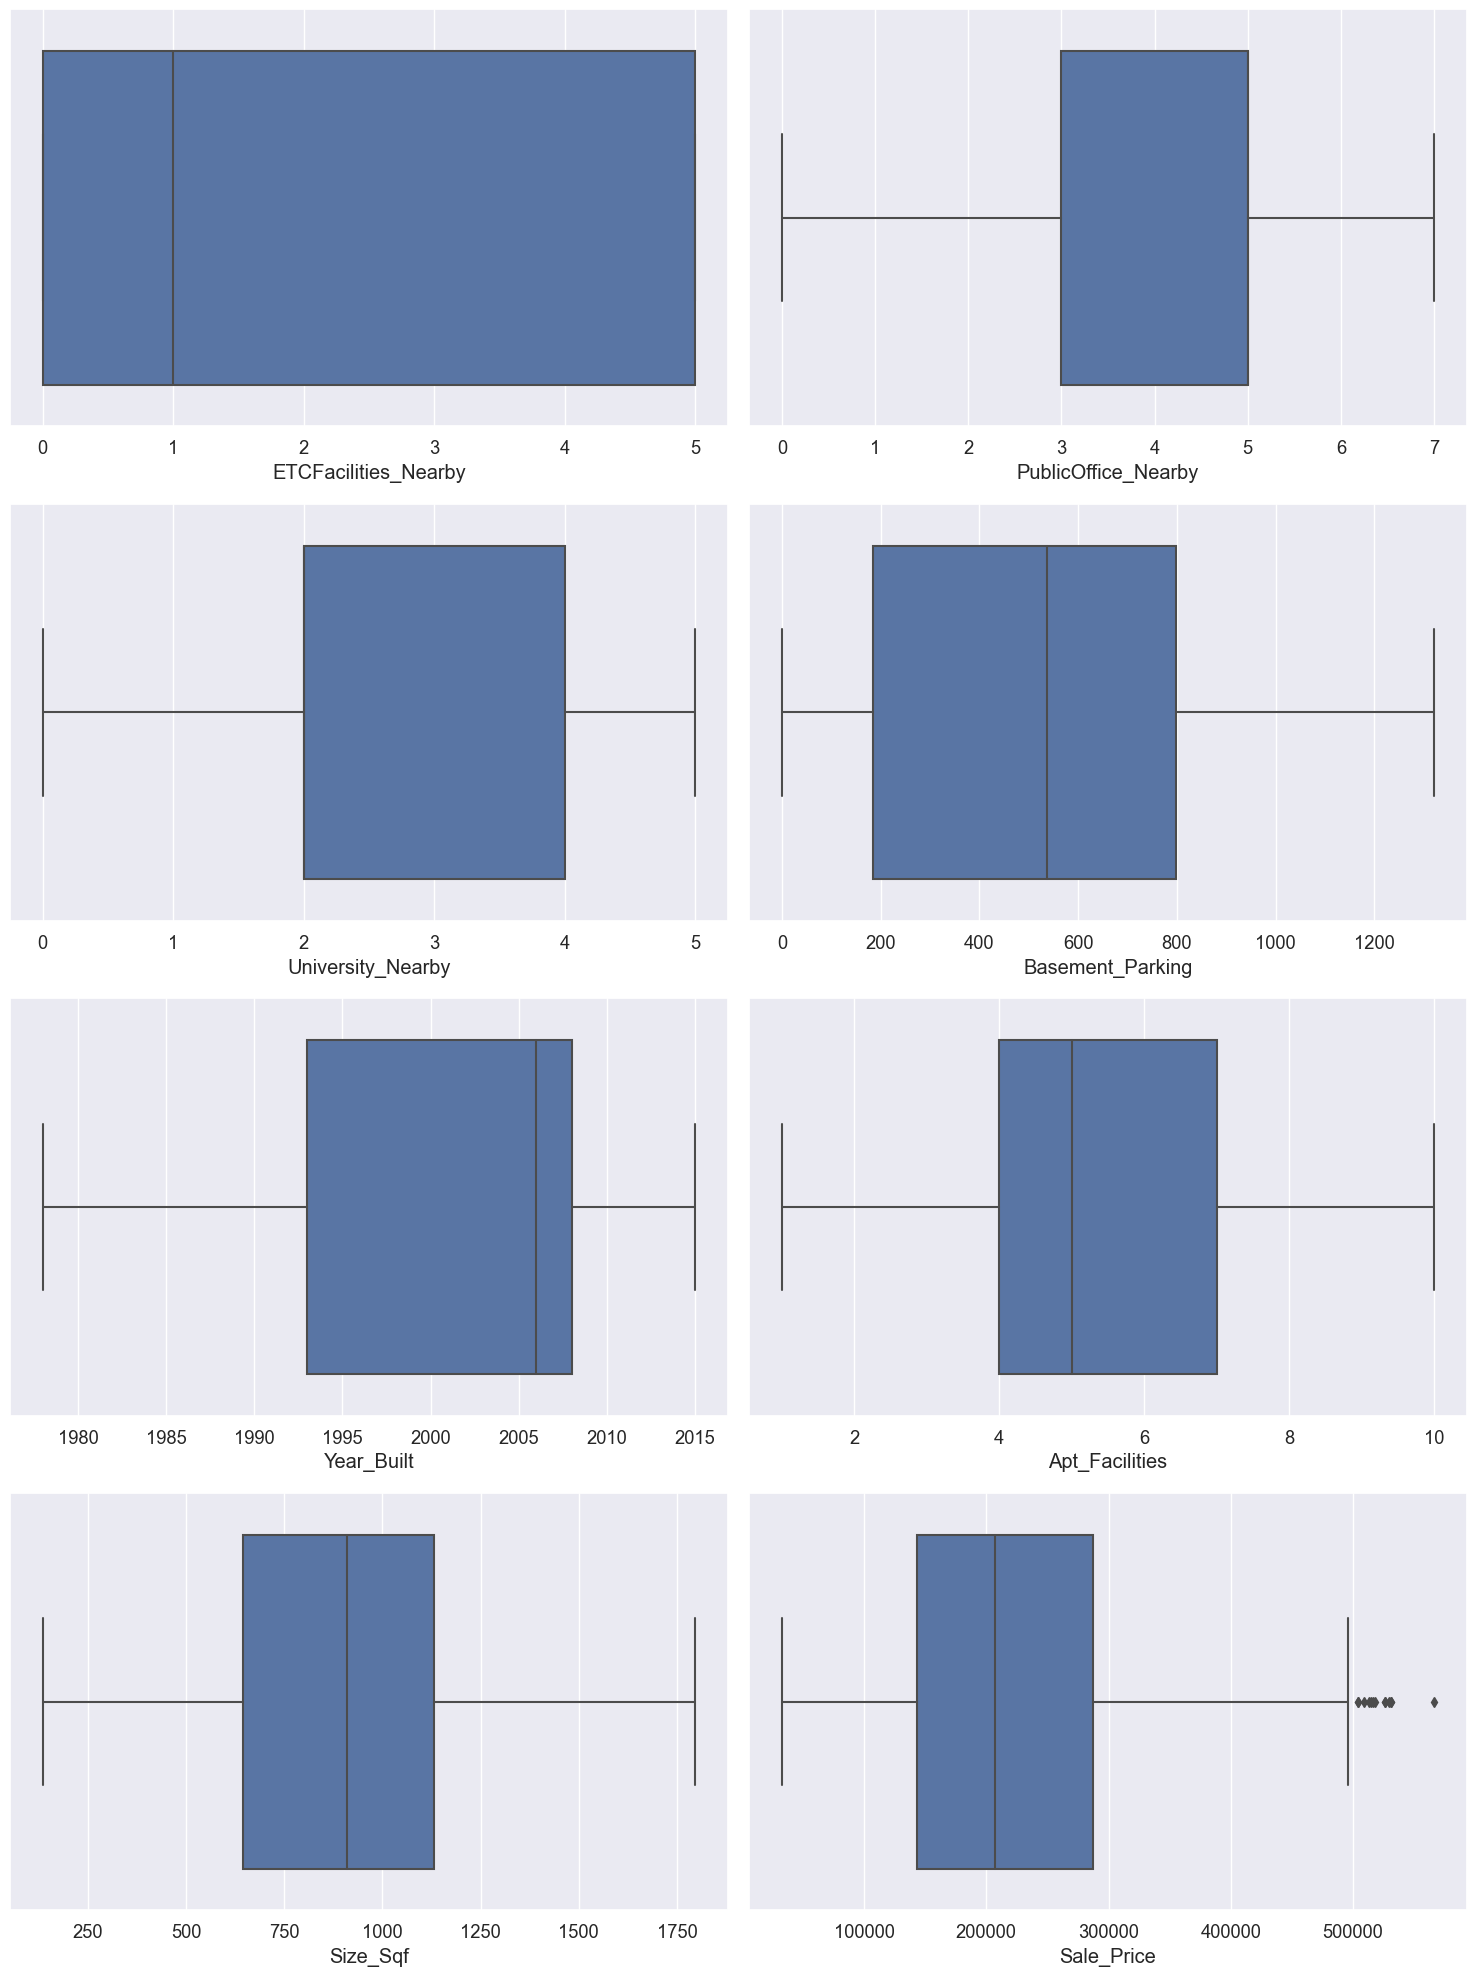

In [21]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

# Get the numerical columns from your DataFrame
numerical_columns = df.select_dtypes(include=[np.number]).columns[:8]

for i, column in enumerate(numerical_columns):
    row = i // 2
    col = i % 2
    sns.boxplot(ax=axes[row, col], x=df[column])

plt.tight_layout()
plt.show()

Berdasarkan visualisasi diatas setelah dilakukan handling outlier maka saat ini hanya ada satu kolom yang memiliki outlier yaitu kolom Sale_Price

* #### Check & Handling Duplicated Data

In [22]:
#duplicate data check
df.duplicated().sum()

1408

In [23]:
#handling duplicate data
df.drop_duplicates(keep='first', inplace=True)

In [24]:
#duplicated data check
df.duplicated().sum()

0

Setelah dilakukan pengecekan ulang, dapat dilihat bahwa tidak ditemukan lagi record value yang duplikat.

**Multicollinearity Check**

In [25]:
#check VIF on Numerical Features
X_vif = df[numerical_features]
vif = pd.DataFrame()
vif['Feature'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]
vif.sort_values(by='VIF', ascending=False)

Feature        VIF
6            Year_Built  32.855082
4        Apt_Facilities  25.296815
2     University_Nearby  16.102008
1   PublicOffice_Nearby  13.992477
3      Basement_Parking  10.819914
5              Size_Sqf  10.765854
0  ETCFacilities_Nearby   5.865876

Jika VIF besar menandakan ia berkorelasi dengan fitur lainnya. Korelasinya dapat dilihat pada Correlation Matrix dibawah ini

In [26]:
# Calculate correlation
corr = df[['ETCFacilities_Nearby', 'PublicOffice_Nearby', 'University_Nearby', 'Basement_Parking', 'Year_Built', 'Apt_Facilities', 'Size_Sqf', 'Sale_Price']].corr(method='pearson')

# Create heatmap
fig = go.Figure(data=go.Heatmap(
                   z=corr,
                   x=corr.columns,
                   y=corr.columns,
                   hoverongaps = False,
                   colorscale='Viridis'))

# Add correlation values
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        fig.add_annotation(dict(font=dict(color="black",size=14),
                                x=corr.columns[i],
                                y=corr.columns[j],
                                text=str(round(corr.iloc[i, j], 2)),
                                showarrow=False,
                                align='center'))

# Update layout
fig.update_layout(
    title='Correlation Matrix',
    xaxis_nticks=len(corr.columns),
    yaxis_nticks=len(corr.columns),
    autosize=False,
    height=500,
    width=700,
)

fig.show()

In [27]:
numerical_features = ['ETCFacilities_Nearby', 'PublicOffice_Nearby', 'University_Nearby', 'Basement_Parking', 'Apt_Facilities', 'Size_Sqf']
#check VIF on Numerical Features
X_vif = df[numerical_features]
vif = pd.DataFrame()
vif['Feature'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]
vif.sort_values(by='VIF', ascending=False)

Feature        VIF
4        Apt_Facilities  15.720329
2     University_Nearby  14.741815
1   PublicOffice_Nearby  12.471212
3      Basement_Parking   8.412464
5              Size_Sqf   6.134025
0  ETCFacilities_Nearby   5.734113

In [28]:
numerical_features = ['ETCFacilities_Nearby', 'PublicOffice_Nearby', 'University_Nearby', 'Basement_Parking', 'Size_Sqf']
#check VIF on Numerical Features
X_vif = df[numerical_features]
vif = pd.DataFrame()
vif['Feature'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]
vif.sort_values(by='VIF', ascending=False)

Feature        VIF
2     University_Nearby  14.680194
1   PublicOffice_Nearby  11.100011
0  ETCFacilities_Nearby   5.651608
4              Size_Sqf   4.850882
3      Basement_Parking   3.127384

In [29]:
numerical_features = ['ETCFacilities_Nearby', 'PublicOffice_Nearby', 'Basement_Parking', 'Size_Sqf']
#check VIF on Numerical Features
X_vif = df[numerical_features]
vif = pd.DataFrame()
vif['Feature'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]
vif.sort_values(by='VIF', ascending=False)

Feature       VIF
1   PublicOffice_Nearby  7.644671
3              Size_Sqf  4.798419
0  ETCFacilities_Nearby  3.828364
2      Basement_Parking  2.721397

In [30]:
# Numeric Features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Perform Shapiro-Wilk test for each numeric feature
normality_test = []
for feature in numeric_features:
    stat, p = shapiro(df[feature])
    normality_test.append([feature, p])
normality_test = pd.DataFrame(normality_test, columns=['Feature', 'p-Value'])
normality_test['Distribution'] = np.where(normality_test['p-Value'] >= 0.05, 'Normal', 'Non-Normal')
normality_test

Feature       p-Value Distribution
0  ETCFacilities_Nearby  0.000000e+00   Non-Normal
1   PublicOffice_Nearby  2.623744e-33   Non-Normal
2     University_Nearby  3.545285e-43   Non-Normal
3      Basement_Parking  8.264354e-38   Non-Normal
4            Year_Built  1.287793e-42   Non-Normal
5        Apt_Facilities  3.472994e-39   Non-Normal
6              Size_Sqf  1.575972e-30   Non-Normal
7            Sale_Price  1.095250e-16   Non-Normal

Untuk penentuan pemilihan scaler maka dilakukan uji normalitas dengan shapiro wilk, dan didapati hasil bahwa rata rata fitur memiliki distribusi tidak normal.

#### Unique Value Pada Setiap Columns

In [31]:
print(f'The number of rows and columns : {df.shape}')

pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    'neg_value': [True if df[col].dtype == int and (df[col] < 0).any() else False for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

The number of rows and columns : (2617, 11)


feature data_type  null_value  neg_value  n_unique  \
0           Hallway_Type    object         0.0      False         3   
1         Time_To_Subway    object         0.0      False         5   
2         Subway_Station    object         0.0      False         8   
3   ETCFacilities_Nearby   float64         0.0      False         4   
4    PublicOffice_Nearby   float64         0.0      False         8   
5      University_Nearby   float64         0.0      False         6   
6       Basement_Parking   float64         0.0      False        20   
7             Year_Built     int64         0.0      False        16   
8         Apt_Facilities     int64         0.0      False         9   
9               Size_Sqf     int64         0.0      False        85   
10            Sale_Price     int64         0.0      False       813   

                                        sample_unique  
0                         [terraced, mixed, corridor]  
1   [0-5min, 10min-15min, 15min-20min, 5min-10min,...  
2   [Kyungbuk_uni_hospital, Chil-sung-market, Bang...  
3                                [0.0, 1.0, 5.0, 2.0]  
4            [3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]  
5                      [2.0, 1.0, 3.0, 4.0, 5.0, 0.0]  
6   [1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0...  
7   [2007, 1986, 1997, 2005, 2006, 2009, 2014, 199...  
8                        [10, 4, 5, 7, 2, 9, 8, 1, 3]  
9   [1387, 914, 558, 1743, 1334, 572, 910, 288, 11...  
10  [346017, 150442, 61946, 165486, 311504, 118584...

Tipe data dari kolom `ETCFacilities_Nearby`, `PublicOffice_Nearby`, `University_Nearby`, dan `Basement_Parking` bersifat float, kita ubah menjadi tipe data integer.

In [32]:
# Mengubah tipe data dari float menjadi integer.
df['ETCFacilities_Nearby'] = df['ETCFacilities_Nearby'].astype('int64')
df['PublicOffice_Nearby'] = df['PublicOffice_Nearby'].astype('int64')
df['University_Nearby'] = df['University_Nearby'].astype('int64')
df['Basement_Parking'] = df['Basement_Parking'].astype('int64')

#### Category Feature Encoding & Numerical Feature Scaler

Encoding adalah proses mengubah data dari satu bentuk ke bentuk lain, biasanya dari format teks menjadi representasi angka. Ini umumnya dilakukan dalam konteks pemrosesan data dan pembelajaran mesin, karena banyak algoritma pemodelan mesin hanya dapat bekerja dengan data numerik. Terdapat tiga kolom dengan data categorical yang perlu dilakukan encoding antara lain:
* Hallway_Type : Mengunakan encoding dengan tipe One-Hot Encoding karena terdapat 3 kategori (memiliki sedikit kategori data, kurang dari 5 kategori)
* Subway_Station : Mengunakan encoding dengan tipe Binary Encoding karena terdapat 8 kategori (memiliki banyak kategori data, lebih dari 5 kategori)
* Time_To_Subway : Mengunakan encoding dengan tipe Ordinal Encoding karena bedasar kelompok waktunya akan diurutkan dari yang terendah (jauh dari subway) ke yang tertinggi (dekat dari subway).

In [34]:
df_model = df.copy()

In [35]:
# Mengecek nilai unik dari fitur TimeToSubway\
df_model['Time_To_Subway'].value_counts()

0-5min                1196
5min-10min             501
10min-15min            426
15min-20min            394
no_bus_stop_nearby     100
Name: Time_To_Subway, dtype: int64

In [36]:
df_model

Hallway_Type Time_To_Subway         Subway_Station  ETCFacilities_Nearby  \
0        terraced         0-5min  Kyungbuk_uni_hospital                     0   
1        terraced    10min-15min  Kyungbuk_uni_hospital                     1   
2           mixed    15min-20min       Chil-sung-market                     1   
3           mixed     5min-10min                Bangoge                     5   
4        terraced         0-5min                Sin-nam                     0   
...           ...            ...                    ...                   ...   
4116     terraced         0-5min                Sin-nam                     0   
4117        mixed    15min-20min              Myung-duk                     5   
4118     terraced         0-5min                Sin-nam                     0   
4119        mixed    15min-20min              Myung-duk                     5   
4121     corridor     5min-10min                  Daegu                     2   

      PublicOffice_Nearby  University_Nearby  Basement_Parking  Year_Built  \
0                       3                  2              1270        2007   
1                       5                  1                 0        1986   
2                       7                  3                56        1997   
3                       5                  4               798        2005   
4                       1                  2               536        2006   
...                   ...                ...               ...         ...   
4116                    1                  2               536        2006   
4117                    6                  5               536        1993   
4118                    3                  2               475        2008   
4119                    6                  5               536        1993   
4121                    5                  0                76        1985   

      Apt_Facilities  Size_Sqf  Sale_Price  
0                 10      1387      346017  
1                  4       914      150442  
2                  5       558       61946  
3                  7       914      165486  
4                  5      1743      311504  
...              ...       ...         ...  
4116               5       818      290265  
4117               4      1761      345132  
4118               8       914      323008  
4119               4      1451      242477  
4121               3       676       73451  

[2617 rows x 11 columns]

In [37]:
cat = []
category_features = df.select_dtypes(include=[object]).columns
for col in category_features:
    cat.append([col, df[col].nunique(), df[col].unique()])
cat = pd.DataFrame(cat, columns=['Feature', 'Unique', 'Value'])
pd.set_option('display.max_colwidth', None)
cat

Feature  Unique  \
0    Hallway_Type       3   
1  Time_To_Subway       5   
2  Subway_Station       8   

                                                                                                         Value  
0                                                                                  [terraced, mixed, corridor]  
1                                           [0-5min, 10min-15min, 15min-20min, 5min-10min, no_bus_stop_nearby]  
2  [Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]

In [38]:
x = df_model.drop(['Sale_Price','Year_Built','Apt_Facilities','University_Nearby'], axis=1)
y = df_model['Sale_Price']


ordinal_mapping = [
    {'col':'Time_To_Subway',
     'mapping':{'no_bus_stop_nearby':0, '15min-20min':1, '10min-15min':2, '5min-10min':3, '0-5min':4 }}
    ]

ordinal_encoder = ce.OrdinalEncoder(cols=['Time_To_Subway'], mapping=ordinal_mapping)

transformer1 = ColumnTransformer([
                                ('tf1_one_hot_encoder', OneHotEncoder(drop='first'), ['Hallway_Type']),
                                ('tf1_binary_encoder', ce.BinaryEncoder(), ['Subway_Station']),
                                ('tf1_ordinal_encoder', ordinal_encoder, ['Time_To_Subway']),
                                ('tf1_minmax_scaler', MinMaxScaler(), ['ETCFacilities_Nearby', 'PublicOffice_Nearby', 'Basement_Parking', 'Size_Sqf']),
])

transformer2 = ColumnTransformer([
                                ('tf2_one_hot_encoder', OneHotEncoder(drop='first'), ['Hallway_Type']),
                                ('tf2_binary_encoder', ce.BinaryEncoder(), ['Subway_Station']),
                                ('tf2_ordinal_encoder', ordinal_encoder, ['Time_To_Subway']),
                                ('tf2_standard_scaler', StandardScaler(), ['ETCFacilities_Nearby', 'PublicOffice_Nearby', 'Basement_Parking', 'Size_Sqf']),
])

transformer3 = ColumnTransformer([
                                ('tf3_one_hot_encoder', OneHotEncoder(drop='first'), ['Hallway_Type','Subway_Station']),
                                ('tf3_ordinal_encoder', ce.OrdinalEncoder(), ['Time_To_Subway']),
                                ('tf3_minmax_scaler', MinMaxScaler(), ['ETCFacilities_Nearby', 'PublicOffice_Nearby', 'Basement_Parking', 'Size_Sqf']),
])

transformer4 = ColumnTransformer([
                                ('tf4_one_hot_encoder', OneHotEncoder(drop='first'), ['Hallway_Type','Subway_Station']),
                                ('tf4_ordinal_encoder', ce.OrdinalEncoder(), ['Time_To_Subway']),
                                ('tf4_standard_scaler', StandardScaler(), ['ETCFacilities_Nearby', 'PublicOffice_Nearby', 'Basement_Parking', 'Size_Sqf']),
])

#Make list of Transformer
transformer = [transformer1, transformer2, transformer3, transformer4]

## 4. Modeling

#### Choose a Benchmark Model

Setelah dilakukannya dataset yang telah dibagi kedalam kelompok data training dan data testing, sekarang kita akan memilih benchmark model yang akan digunakan sebagai model referensi model sebagai dasar perbandingan kinerja model yang dipilih untuk dikembangkan pada proses selanjutnya.

#### Model Dasar Untuk Benchmark Model

Beberapa model regresi yang akan digunakan dalam pemilihan benchmark model antara lain sebagai berikut :
* Linear Regression: Model statistik yang digunakan untuk memodelkan hubungan linear antara variabel independen (fitur) dan variabel dependen (target). 
* Lasso Regression : Model dalam machine learning yang merupakan variasi dari Linear Regression. Tujuan utama dari Lasso Regression adalah untuk mengurangi overfitting dan melakukan seleksi fitur (feature selection) dengan cara memberikan bobot nol pada beberapa fitur yang dianggap tidak relevan.
* Ridge Regression: Model regresi linear yang digunakan untuk mengurangi overfitting dengan menambahkan jumlah kuadrat dari koefisien sebagai regularisasi pada persamaan regresi linier.
* KNN Regression: Model regresi berbasis algoritma K-Nearest Neighbors (KNN) dengan mencari K tetangga terdekat dari data input yang ingin diprediksi dan kemudian melakukan prediksi variabel target numerik.
* Decision Tree Regression: Model regresi memprediksi nilai kontinu (numerik) berdasarkan fitur-fitur yang diberikan. Decision Tree Regression menggunakan struktur pohon keputusan (decision tree) untuk memecah data menjadi beberapa bagian yang lebih kecil dan homogen, dan setiap bagian akan diberi prediksi berdasarkan nilai rata-rata dari target pada bagian tersebut.
* Random Forest Regression: Model regresi yang membangun beberapa decision tree secara acak dengan menggunakan subset data training yang berbeda-beda dan subset fitur yang acak dari dataset yang tersedia dan setiap decision tree dihasilkan dengan menggunakan teknik bootstrap sampling dan feature bagging.
* XGBoost (Extreme Gradient Boosting) Regression: Model regresi yang memanfaatkan teknik gradient boosting dengan pendekatan ensemble learning.

K-fold cross validation juga digunakan sebagai metode evaluasi performa model yang dilakukan dengan membagi dataset menjadi 5 partisi yang sama besar lalu model akan dilatih pada 4 partisi dan diuji pada partisi yang tersisa. Prosedur ini akan dilakukan sebanyak 5 kali dengan partisi yang berbeda-beda sebagai data validasi dan data training sehingga akhirnya performa model akan dihitung berdasarkan rata-rata performa. Metode ini berguna untuk menghindari overfitting atau underfitting dan untuk mendapatkan generalisasi model yang lebih baik.


In [39]:
#splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,  
    test_size=0.20,
    random_state=99)

#define algorithm
linreg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=99)
rf = RandomForestRegressor(random_state=99)
xgb = XGBRegressor(random_state=99)

#Define Cross Validation & Scoring
cv = KFold(n_splits=5, shuffle=True, random_state=99)
scoring = ['neg_mean_squared_log_error', 'neg_mean_absolute_percentage_error','neg_mean_absolute_error', 'neg_mean_squared_error']

#Define column transformer space
transformer_grid = {'preprocess': transformer}

#column name for transformer result
transformer_benchmark_column = ['Rank', 'Column Transformer', 'Mean MSLE', 'Std MSLE', 'Mean MAPE', 'Std MAPE', 'Mean MAE', 'Std MAE', 'Mean MSE', 'Std MSE']

**Column Transformer Benchmarking**

Pertama, kita akan mencari kolom transformer yang paling cocok untuk masing-masing model regresi.

**Linear Regression**

In [40]:
#Define Linear Model for Column Transformer Benchmarking
linear_model = Pipeline([
    ('preprocess', DummyEstimator()),
    ('model', linreg)
])

#GridSearchCV for Linear Model Column Transformer Benchmarking
linear_model_grid = GridSearchCV(
    estimator = linear_model,
    param_grid=transformer_grid,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    n_jobs=-1,
    verbose=1
)

#Fit Linear Model Column Transformer Benchmarking
linear_model_grid.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=99, shuffle=True),
             estimator=Pipeline(steps=[('preprocess', DummyEstimator()),
                                       ('model', LinearRegression())]),
             n_jobs=-1,
             param_grid={'preprocess': [ColumnTransformer(transformers=[('tf1_one_hot_encoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Hallway_Type']),
                                                                        ('tf1_binary_encoder',
                                                                         BinaryEncoder(),
                                                                         ['Subway_Station']),
                                                                        ('t...
                                                                        ('tf4_ordinal_encoder',
                                                                         OrdinalEncoder(),
                                                                         ['Time_To_Subway']),
                                                                        ('tf4_standard_scaler',
                                                                         StandardScaler(),
                                                                         ['ETCFacilities_Nearby',
                                                                          'PublicOffice_Nearby',
                                                                          'Basement_Parking',
                                                                          'Size_Sqf'])])]},
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [41]:
#show the result column Transformer Benchmark for linear model
linear_benchmark_result = pd.DataFrame(linear_model_grid.cv_results_)[['rank_test_neg_mean_squared_log_error', 'param_preprocess', 'mean_test_neg_mean_squared_log_error', 
                                                                       'std_test_neg_mean_squared_log_error', 'mean_test_neg_mean_absolute_percentage_error', 
                                                                       'std_test_neg_mean_absolute_percentage_error', 'mean_test_neg_mean_absolute_error', 
                                                                       'std_test_neg_mean_absolute_error', 'mean_test_neg_mean_squared_error', 'std_test_neg_mean_squared_error']]
linear_benchmark_result.columns = transformer_benchmark_column
#extract the name of the transformer
linear_benchmark_result['Column Transformer'] = linear_benchmark_result['Column Transformer'].apply(lambda x: [name for name, _, _ in x.transformers])

#sort the result
linear_benchmark_result.sort_values(by='Rank', inplace=True)
linear_benchmark_result.reset_index(drop=True, inplace=True)
linear_benchmark_result

Rank  \
0     1   
1     2   
2     3   
3     4   

                                                                    Column Transformer  \
0  [tf2_one_hot_encoder, tf2_binary_encoder, tf2_ordinal_encoder, tf2_standard_scaler]   
1    [tf1_one_hot_encoder, tf1_binary_encoder, tf1_ordinal_encoder, tf1_minmax_scaler]   
2                      [tf4_one_hot_encoder, tf4_ordinal_encoder, tf4_standard_scaler]   
3                        [tf3_one_hot_encoder, tf3_ordinal_encoder, tf3_minmax_scaler]   

   Mean MSLE  Std MSLE  Mean MAPE  Std MAPE      Mean MAE      Std MAE  \
0  -0.069185  0.006547  -0.227977  0.013704 -43848.512189  1337.093489   
1  -0.069185  0.006547  -0.227977  0.013704 -43848.512189  1337.093489   
2  -0.069227  0.006216  -0.228959  0.013323 -43740.821277  1187.416627   
3  -0.069227  0.006216  -0.228959  0.013323 -43740.821277  1187.416627   

       Mean MSE       Std MSE  
0 -2.931103e+09  2.066236e+08  
1 -2.931103e+09  2.066236e+08  
2 -2.908849e+09  1.986882e+08  
3 -2.908849e+09  1.986882e+08

In [42]:
#Define Linear Model
linreg = Pipeline([
    ('preprocess', transformer2),
    ('model', linreg)
])

**Ridge Regression**

In [43]:
#Define Ridge Model for Column Transformer Benchmarking
ridge_model = Pipeline([
    ('preprocess', DummyEstimator()),
    ('model', ridge)
])

#GridSearchCV for Ridge Model Column Transformer Benchmarking
ridge_grid = GridSearchCV(
    estimator = ridge_model,
    param_grid=transformer_grid,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    n_jobs=-1,
    verbose=1
)

#Fit Ridge Model Column Transformer Benchmarking
ridge_grid.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=99, shuffle=True),
             estimator=Pipeline(steps=[('preprocess', DummyEstimator()),
                                       ('model', Ridge())]),
             n_jobs=-1,
             param_grid={'preprocess': [ColumnTransformer(transformers=[('tf1_one_hot_encoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Hallway_Type']),
                                                                        ('tf1_binary_encoder',
                                                                         BinaryEncoder(),
                                                                         ['Subway_Station']),
                                                                        ('tf1_ordinal_...
                                                                        ('tf4_ordinal_encoder',
                                                                         OrdinalEncoder(),
                                                                         ['Time_To_Subway']),
                                                                        ('tf4_standard_scaler',
                                                                         StandardScaler(),
                                                                         ['ETCFacilities_Nearby',
                                                                          'PublicOffice_Nearby',
                                                                          'Basement_Parking',
                                                                          'Size_Sqf'])])]},
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [44]:
#show the result column Transformer Benchmark for ridge model
ridge_benchmark_result = pd.DataFrame(ridge_grid.cv_results_)[['rank_test_neg_mean_squared_log_error', 'param_preprocess', 'mean_test_neg_mean_squared_log_error', 
                                                                       'std_test_neg_mean_squared_log_error', 'mean_test_neg_mean_absolute_percentage_error', 
                                                                       'std_test_neg_mean_absolute_percentage_error', 'mean_test_neg_mean_absolute_error', 
                                                                       'std_test_neg_mean_absolute_error', 'mean_test_neg_mean_squared_error', 'std_test_neg_mean_squared_error']]
ridge_benchmark_result.columns = transformer_benchmark_column
#extract the name of the transformer
ridge_benchmark_result['Column Transformer'] = ridge_benchmark_result['Column Transformer'].apply(lambda x: [name for name, _, _ in x.transformers])

#sort the result
ridge_benchmark_result.sort_values(by='Rank', inplace=True)
ridge_benchmark_result.reset_index(drop=True, inplace=True)
ridge_benchmark_result

Rank  \
0     1   
1     2   
2     3   
3     4   

                                                                    Column Transformer  \
0  [tf2_one_hot_encoder, tf2_binary_encoder, tf2_ordinal_encoder, tf2_standard_scaler]   
1    [tf1_one_hot_encoder, tf1_binary_encoder, tf1_ordinal_encoder, tf1_minmax_scaler]   
2                      [tf4_one_hot_encoder, tf4_ordinal_encoder, tf4_standard_scaler]   
3                        [tf3_one_hot_encoder, tf3_ordinal_encoder, tf3_minmax_scaler]   

   Mean MSLE  Std MSLE  Mean MAPE  Std MAPE      Mean MAE      Std MAE  \
0  -0.069127  0.006566  -0.227981  0.013706 -43852.104001  1337.976353   
1  -0.069159  0.006526  -0.228173  0.013611 -43838.998123  1321.821137   
2  -0.069280  0.006174  -0.229127  0.013221 -43740.305746  1171.929641   
3  -0.069314  0.006111  -0.229197  0.013107 -43717.307612  1146.381668   

       Mean MSE       Std MSE  
0 -2.931298e+09  2.065807e+08  
1 -2.932051e+09  2.041772e+08  
2 -2.908317e+09  1.978717e+08  
3 -2.908696e+09  1.947324e+08

In [45]:
#Define Ridge Model
ridge = Pipeline([
    ('preprocess', transformer2),
    ('model', ridge)
])

**Lasso Regression**

In [46]:
#Define Lasso Model for Column Transformer Benchmarking
lasso_model = Pipeline([
    ('preprocess', DummyEstimator()),
    ('model', lasso)
])

#GridSearchCV for Lasso Model Column Transformer Benchmarking
lasso_grid = GridSearchCV(
    estimator = lasso_model,
    param_grid=transformer_grid,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    n_jobs=-1,
    verbose=1
)

#Fit Lasso Model Column Transformer Benchmarking
lasso_grid.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=99, shuffle=True),
             estimator=Pipeline(steps=[('preprocess', DummyEstimator()),
                                       ('model', Lasso())]),
             n_jobs=-1,
             param_grid={'preprocess': [ColumnTransformer(transformers=[('tf1_one_hot_encoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Hallway_Type']),
                                                                        ('tf1_binary_encoder',
                                                                         BinaryEncoder(),
                                                                         ['Subway_Station']),
                                                                        ('tf1_ordinal_...
                                                                        ('tf4_ordinal_encoder',
                                                                         OrdinalEncoder(),
                                                                         ['Time_To_Subway']),
                                                                        ('tf4_standard_scaler',
                                                                         StandardScaler(),
                                                                         ['ETCFacilities_Nearby',
                                                                          'PublicOffice_Nearby',
                                                                          'Basement_Parking',
                                                                          'Size_Sqf'])])]},
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [47]:
#show the result column Transformer Benchmark for lasso model
lasso_benchmark_result = pd.DataFrame(lasso_grid.cv_results_)[['rank_test_neg_mean_squared_log_error', 'param_preprocess', 'mean_test_neg_mean_squared_log_error', 
                                                                       'std_test_neg_mean_squared_log_error', 'mean_test_neg_mean_absolute_percentage_error', 
                                                                       'std_test_neg_mean_absolute_percentage_error', 'mean_test_neg_mean_absolute_error', 
                                                                       'std_test_neg_mean_absolute_error', 'mean_test_neg_mean_squared_error', 'std_test_neg_mean_squared_error']]
lasso_benchmark_result.columns = transformer_benchmark_column
#extract the name of the transformer
lasso_benchmark_result['Column Transformer'] = lasso_benchmark_result['Column Transformer'].apply(lambda x: [name for name, _, _ in x.transformers])

#sort the result
lasso_benchmark_result.sort_values(by='Rank', inplace=True)
lasso_benchmark_result.reset_index(drop=True, inplace=True)
lasso_benchmark_result

Rank  \
0     1   
1     2   
2     3   
3     4   

                                                                    Column Transformer  \
0  [tf2_one_hot_encoder, tf2_binary_encoder, tf2_ordinal_encoder, tf2_standard_scaler]   
1    [tf1_one_hot_encoder, tf1_binary_encoder, tf1_ordinal_encoder, tf1_minmax_scaler]   
2                      [tf4_one_hot_encoder, tf4_ordinal_encoder, tf4_standard_scaler]   
3                        [tf3_one_hot_encoder, tf3_ordinal_encoder, tf3_minmax_scaler]   

   Mean MSLE  Std MSLE  Mean MAPE  Std MAPE      Mean MAE      Std MAE  \
0  -0.069180  0.006548  -0.227972  0.013706 -43848.596392  1337.402753   
1  -0.069182  0.006548  -0.227975  0.013706 -43848.444725  1337.466804   
2  -0.069235  0.006209  -0.228978  0.013310 -43741.176610  1186.344865   
3  -0.069236  0.006209  -0.228980  0.013310 -43740.921954  1186.222458   

       Mean MSE       Std MSE  
0 -2.931124e+09  2.066503e+08  
1 -2.931124e+09  2.066444e+08  
2 -2.908818e+09  1.986276e+08  
3 -2.908818e+09  1.986099e+08

In [48]:
#Define Lasso Model
lasso = Pipeline([
    ('preprocess', transformer2),
    ('model', lasso)
])

**KNeighbors Regressor**

In [49]:
#Define KNN Model for Column Transformer Benchmarking
knn_model = Pipeline([
    ('preprocess', DummyEstimator()),
    ('model', knn)
])

#GridSearchCV for KNN Model Column Transformer Benchmarking
knn_grid = GridSearchCV(
    estimator = knn_model,
    param_grid=transformer_grid,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    n_jobs=-1,
    verbose=1
)

#Fit KNN Model Column Transformer Benchmarking
knn_grid.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=99, shuffle=True),
             estimator=Pipeline(steps=[('preprocess', DummyEstimator()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'preprocess': [ColumnTransformer(transformers=[('tf1_one_hot_encoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Hallway_Type']),
                                                                        ('tf1_binary_encoder',
                                                                         BinaryEncoder(),
                                                                         ['Subway_Station']),...
                                                                        ('tf4_ordinal_encoder',
                                                                         OrdinalEncoder(),
                                                                         ['Time_To_Subway']),
                                                                        ('tf4_standard_scaler',
                                                                         StandardScaler(),
                                                                         ['ETCFacilities_Nearby',
                                                                          'PublicOffice_Nearby',
                                                                          'Basement_Parking',
                                                                          'Size_Sqf'])])]},
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [50]:
#show the result column Transformer Benchmark for knn model
knn_benchmark_result = pd.DataFrame(knn_grid.cv_results_)[['rank_test_neg_mean_squared_log_error', 'param_preprocess', 'mean_test_neg_mean_squared_log_error', 
                                                                       'std_test_neg_mean_squared_log_error', 'mean_test_neg_mean_absolute_percentage_error', 
                                                                       'std_test_neg_mean_absolute_percentage_error', 'mean_test_neg_mean_absolute_error', 
                                                                       'std_test_neg_mean_absolute_error', 'mean_test_neg_mean_squared_error', 'std_test_neg_mean_squared_error']]
knn_benchmark_result.columns = transformer_benchmark_column
#extract the name of the transformer
knn_benchmark_result['Column Transformer'] = knn_benchmark_result['Column Transformer'].apply(lambda x: [name for name, _, _ in x.transformers])

#sort the result
knn_benchmark_result.sort_values(by='Rank', inplace=True)
knn_benchmark_result.reset_index(drop=True, inplace=True)
knn_benchmark_result

Rank  \
0     1   
1     2   
2     3   
3     4   

                                                                    Column Transformer  \
0                      [tf4_one_hot_encoder, tf4_ordinal_encoder, tf4_standard_scaler]   
1  [tf2_one_hot_encoder, tf2_binary_encoder, tf2_ordinal_encoder, tf2_standard_scaler]   
2    [tf1_one_hot_encoder, tf1_binary_encoder, tf1_ordinal_encoder, tf1_minmax_scaler]   
3                        [tf3_one_hot_encoder, tf3_ordinal_encoder, tf3_minmax_scaler]   

   Mean MSLE  Std MSLE  Mean MAPE  Std MAPE      Mean MAE      Std MAE  \
0  -0.062113  0.007844  -0.200052  0.012620 -38864.140033  1549.641608   
1  -0.062764  0.010722  -0.200720  0.019156 -38832.037599  2000.934729   
2  -0.063229  0.007651  -0.202315  0.014722 -39316.128702  1284.870426   
3  -0.063388  0.008801  -0.201083  0.016828 -38868.251684  1406.505064   

       Mean MSE       Std MSE  
0 -2.520841e+09  2.605020e+08  
1 -2.523617e+09  3.080435e+08  
2 -2.561607e+09  2.043032e+08  
3 -2.540262e+09  2.262417e+08

In [51]:
#Define KNN Model
knn = Pipeline([
    ('preprocess', transformer4),
    ('model', knn)
])

**Decision Tree Regressor**

In [52]:
#Define Decision Tree Model for Column Transformer Benchmarking
dt_model = Pipeline([
    ('preprocess', DummyEstimator()),
    ('model', dt)
])

#GridSearchCV for Decision Tree Model Column Transformer Benchmarking
dt_grid = GridSearchCV(
    estimator = dt_model,
    param_grid=transformer_grid,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    n_jobs=-1,
    verbose=1
)

#Fit Decision Tree Model Column Transformer Benchmarking
dt_grid.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=99, shuffle=True),
             estimator=Pipeline(steps=[('preprocess', DummyEstimator()),
                                       ('model',
                                        DecisionTreeRegressor(random_state=99))]),
             n_jobs=-1,
             param_grid={'preprocess': [ColumnTransformer(transformers=[('tf1_one_hot_encoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Hallway_Type']),
                                                                        ('tf1_binary_encoder',
                                                                         BinaryEncoder(),
                                                                         ['S...
                                                                        ('tf4_ordinal_encoder',
                                                                         OrdinalEncoder(),
                                                                         ['Time_To_Subway']),
                                                                        ('tf4_standard_scaler',
                                                                         StandardScaler(),
                                                                         ['ETCFacilities_Nearby',
                                                                          'PublicOffice_Nearby',
                                                                          'Basement_Parking',
                                                                          'Size_Sqf'])])]},
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [53]:
#show the result column Transformer Benchmark for decision tree model
dt_benchmark_result = pd.DataFrame(dt_grid.cv_results_)[['rank_test_neg_mean_squared_log_error', 'param_preprocess', 'mean_test_neg_mean_squared_log_error', 
                                                                       'std_test_neg_mean_squared_log_error', 'mean_test_neg_mean_absolute_percentage_error', 
                                                                       'std_test_neg_mean_absolute_percentage_error', 'mean_test_neg_mean_absolute_error', 
                                                                       'std_test_neg_mean_absolute_error', 'mean_test_neg_mean_squared_error', 'std_test_neg_mean_squared_error']]
dt_benchmark_result.columns = transformer_benchmark_column
#extract the name of the transformer
dt_benchmark_result['Column Transformer'] = dt_benchmark_result['Column Transformer'].apply(lambda x: [name for name, _, _ in x.transformers])

#sort the result
dt_benchmark_result.sort_values(by='Rank', inplace=True)
dt_benchmark_result.reset_index(drop=True, inplace=True)
dt_benchmark_result

Rank  \
0     1   
1     1   
2     3   
3     3   

                                                                    Column Transformer  \
0  [tf2_one_hot_encoder, tf2_binary_encoder, tf2_ordinal_encoder, tf2_standard_scaler]   
1                      [tf4_one_hot_encoder, tf4_ordinal_encoder, tf4_standard_scaler]   
2    [tf1_one_hot_encoder, tf1_binary_encoder, tf1_ordinal_encoder, tf1_minmax_scaler]   
3                        [tf3_one_hot_encoder, tf3_ordinal_encoder, tf3_minmax_scaler]   

   Mean MSLE  Std MSLE  Mean MAPE  Std MAPE      Mean MAE      Std MAE  \
0  -0.056344   0.00836  -0.198298  0.014945 -37544.815981  1577.587582   
1  -0.056344   0.00836  -0.198298  0.014945 -37544.815981  1577.587582   
2  -0.056348   0.00836  -0.198308  0.014947 -37545.748039  1577.130093   
3  -0.056348   0.00836  -0.198308  0.014947 -37545.748039  1577.130093   

       Mean MSE       Std MSE  
0 -2.257924e+09  3.071258e+08  
1 -2.257924e+09  3.071258e+08  
2 -2.257943e+09  3.071128e+08  
3 -2.257943e+09  3.071128e+08

In [54]:
#Define Decision Tree Model
dt = Pipeline([
    ('preprocess', transformer2),
    ('model', dt)
])

**Random Forest Regressor**

In [55]:
#Define Random Forest Model for Column Transformer Benchmarking
rf_model = Pipeline([
    ('preprocess', DummyEstimator()),
    ('model', rf)
])

#GridSearchCV for Random Forest Model Column Transformer Benchmarking
rf_grid = GridSearchCV(
    estimator = rf_model,
    param_grid=transformer_grid,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    n_jobs=-1,
    verbose=1
)

#Fit Random Forest Model Column Transformer Benchmarking
rf_grid.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=99, shuffle=True),
             estimator=Pipeline(steps=[('preprocess', DummyEstimator()),
                                       ('model',
                                        RandomForestRegressor(random_state=99))]),
             n_jobs=-1,
             param_grid={'preprocess': [ColumnTransformer(transformers=[('tf1_one_hot_encoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Hallway_Type']),
                                                                        ('tf1_binary_encoder',
                                                                         BinaryEncoder(),
                                                                         ['S...
                                                                        ('tf4_ordinal_encoder',
                                                                         OrdinalEncoder(),
                                                                         ['Time_To_Subway']),
                                                                        ('tf4_standard_scaler',
                                                                         StandardScaler(),
                                                                         ['ETCFacilities_Nearby',
                                                                          'PublicOffice_Nearby',
                                                                          'Basement_Parking',
                                                                          'Size_Sqf'])])]},
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [56]:
#show the result column Transformer Benchmark for random forest model
rf_benchmark_result = pd.DataFrame(rf_grid.cv_results_)[['rank_test_neg_mean_squared_log_error', 'param_preprocess', 'mean_test_neg_mean_squared_log_error', 
                                                                       'std_test_neg_mean_squared_log_error', 'mean_test_neg_mean_absolute_percentage_error', 
                                                                       'std_test_neg_mean_absolute_percentage_error', 'mean_test_neg_mean_absolute_error', 
                                                                       'std_test_neg_mean_absolute_error', 'mean_test_neg_mean_squared_error', 'std_test_neg_mean_squared_error']]
rf_benchmark_result.columns = transformer_benchmark_column
#extract the name of the transformer
rf_benchmark_result['Column Transformer'] = rf_benchmark_result['Column Transformer'].apply(lambda x: [name for name, _, _ in x.transformers])

#sort the result
rf_benchmark_result.sort_values(by='Rank', inplace=True)
rf_benchmark_result.reset_index(drop=True, inplace=True)
rf_benchmark_result

Rank  \
0     1   
1     2   
2     3   
3     4   

                                                                    Column Transformer  \
0                        [tf3_one_hot_encoder, tf3_ordinal_encoder, tf3_minmax_scaler]   
1                      [tf4_one_hot_encoder, tf4_ordinal_encoder, tf4_standard_scaler]   
2    [tf1_one_hot_encoder, tf1_binary_encoder, tf1_ordinal_encoder, tf1_minmax_scaler]   
3  [tf2_one_hot_encoder, tf2_binary_encoder, tf2_ordinal_encoder, tf2_standard_scaler]   

   Mean MSLE  Std MSLE  Mean MAPE  Std MAPE      Mean MAE      Std MAE  \
0  -0.056143  0.008063  -0.198175  0.014588 -37558.120040  1570.233430   
1  -0.056143  0.008063  -0.198178  0.014588 -37558.401241  1570.093411   
2  -0.056149  0.008076  -0.198177  0.014615 -37561.392828  1572.626948   
3  -0.056149  0.008076  -0.198180  0.014615 -37561.674029  1572.486360   

       Mean MSE       Std MSE  
0 -2.245123e+09  2.805601e+08  
1 -2.245126e+09  2.805584e+08  
2 -2.246377e+09  2.827694e+08  
3 -2.246379e+09  2.827677e+08

In [57]:
#Define Random Forest Model
rf = Pipeline([
    ('preprocess', transformer3),
    ('model', rf)
])

**XGBoost**

In [58]:
#Define XGBoost Model for Column Transformer Benchmarking
xgb_model = Pipeline([
    ('preprocess', DummyEstimator()),
    ('model', xgb)
])

#GridSearchCV for XGBoost Model Column Transformer Benchmarking
xgb_grid = GridSearchCV(
    estimator = xgb_model,
    param_grid=transformer_grid,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    n_jobs=-1,
    verbose=1
)

#Fit XGBoost Model Column Transformer Benchmarking
xgb_grid.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=99, shuffle=True),
             estimator=Pipeline(steps=[('preprocess', DummyEstimator()),
                                       ('model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=N...
                                                                        ('tf4_ordinal_encoder',
                                                                         OrdinalEncoder(),
                                                                         ['Time_To_Subway']),
                                                                        ('tf4_standard_scaler',
                                                                         StandardScaler(),
                                                                         ['ETCFacilities_Nearby',
                                                                          'PublicOffice_Nearby',
                                                                          'Basement_Parking',
                                                                          'Size_Sqf'])])]},
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [59]:
#show the result column Transformer Benchmark for xgboost model
xgb_benchmark_result = pd.DataFrame(xgb_grid.cv_results_)[['rank_test_neg_mean_squared_log_error', 'param_preprocess', 'mean_test_neg_mean_squared_log_error', 
                                                                       'std_test_neg_mean_squared_log_error', 'mean_test_neg_mean_absolute_percentage_error', 
                                                                       'std_test_neg_mean_absolute_percentage_error', 'mean_test_neg_mean_absolute_error', 
                                                                       'std_test_neg_mean_absolute_error', 'mean_test_neg_mean_squared_error', 'std_test_neg_mean_squared_error']]
xgb_benchmark_result.columns = transformer_benchmark_column
#extract the name of the transformer
xgb_benchmark_result['Column Transformer'] = xgb_benchmark_result['Column Transformer'].apply(lambda x: [name for name, _, _ in x.transformers])

#sort the result
xgb_benchmark_result.sort_values(by='Rank', inplace=True)
xgb_benchmark_result.reset_index(drop=True, inplace=True)
xgb_benchmark_result

Rank  \
0     1   
1     1   
2     3   
3     3   

                                                                    Column Transformer  \
0                        [tf3_one_hot_encoder, tf3_ordinal_encoder, tf3_minmax_scaler]   
1                      [tf4_one_hot_encoder, tf4_ordinal_encoder, tf4_standard_scaler]   
2    [tf1_one_hot_encoder, tf1_binary_encoder, tf1_ordinal_encoder, tf1_minmax_scaler]   
3  [tf2_one_hot_encoder, tf2_binary_encoder, tf2_ordinal_encoder, tf2_standard_scaler]   

   Mean MSLE  Std MSLE  Mean MAPE  Std MAPE      Mean MAE      Std MAE  \
0  -0.057843  0.008619  -0.198803  0.015256 -37729.848358  1826.400905   
1  -0.057843  0.008619  -0.198803  0.015256 -37729.848358  1826.400905   
2  -0.057870  0.008675  -0.198822  0.015344 -37725.156805  1835.899108   
3  -0.057870  0.008675  -0.198822  0.015344 -37725.156805  1835.899108   

       Mean MSE       Std MSE  
0 -2.344540e+09  3.644223e+08  
1 -2.344540e+09  3.644223e+08  
2 -2.346120e+09  3.673668e+08  
3 -2.346120e+09  3.673668e+08

In [60]:
#Define XGBoost Model
xgb = Pipeline([
    ('preprocess', transformer3),
    ('model', xgb)
])

In [61]:

#Define model space
model_space = [linreg, ridge, lasso, knn, dt, rf, xgb]

#define pipeline
pipe1 = Pipeline([
    ('model', DummyEstimator())
])

cv=KFold(n_splits=10, shuffle=True, random_state=99)
scoring = ['neg_mean_squared_log_error', 'neg_mean_absolute_percentage_error','neg_mean_absolute_error', 'neg_mean_squared_error']

#GridSearchCV
model_benchmark = GridSearchCV(
    estimator=pipe1,
    param_grid={
        'model': model_space
    },
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_error',
    n_jobs=-1
)

#Fit The Grid
model_benchmark.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=99, shuffle=True),
             estimator=Pipeline(steps=[('model', DummyEstimator())]), n_jobs=-1,
             param_grid={'model': [Pipeline(steps=[('preprocess',
                                                    ColumnTransformer(transformers=[('tf2_one_hot_encoder',
                                                                                     OneHotEncoder(drop='first'),
                                                                                     ['Hallway_Type']),
                                                                                    ('tf2_binary_encoder',
                                                                                     BinaryEncoder(),
                                                                                     ['Subway_Station']),
                                                                                    ('tf2_ordin...
                                                                 max_delta_step=None,
                                                                 max_depth=None,
                                                                 max_leaves=None,
                                                                 min_child_weight=None,
                                                                 missing=nan,
                                                                 monotone_constraints=None,
                                                                 multi_strategy=None,
                                                                 n_estimators=None,
                                                                 n_jobs=None,
                                                                 num_parallel_tree=None,
                                                                 random_state=99, ...))])]},
             refit='neg_mean_squared_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'])

In [62]:
#Show the result
model_benchmark_columns = ['Rank','Model', 'Mean MSLE', 'Std MSLE', 'Mean MAPE', 'Std MAPE','Mean MAE', 'Std MAE', 'Mean MSE', 'Std MSE']
model_benchmark_result = pd.DataFrame(model_benchmark.cv_results_)[["rank_test_neg_mean_squared_log_error", "param_model", "mean_test_neg_mean_squared_log_error", 
                                                  "std_test_neg_mean_squared_log_error", "mean_test_neg_mean_absolute_percentage_error","std_test_neg_mean_absolute_percentage_error",
                                                  "mean_test_neg_mean_absolute_error", "std_test_neg_mean_absolute_error","mean_test_neg_mean_squared_error", "std_test_neg_mean_squared_error"]]
model_benchmark_result.columns = model_benchmark_columns

#extract the name of the model
model_benchmark_result['Model'] = model_benchmark_result['Model'].apply(lambda x: type(x.steps[-1][1]).__name__)

#sort the result
model_benchmark_result.sort_values(by='Rank', inplace=True)
model_benchmark_result.reset_index(drop=True, inplace=True)
model_benchmark_result


Rank                  Model  Mean MSLE  Std MSLE  Mean MAPE  Std MAPE  \
0     1  RandomForestRegressor  -0.055662  0.009926  -0.197433  0.018311   
1     2  DecisionTreeRegressor  -0.055981  0.010201  -0.197808  0.018760   
2     3           XGBRegressor  -0.057460  0.011521  -0.198299  0.018971   
3     4    KNeighborsRegressor  -0.062352  0.011662  -0.200271  0.020215   
4     5                  Ridge  -0.068594  0.008923  -0.226687  0.017476   
5     6                  Lasso  -0.068640  0.008940  -0.226672  0.017503   
6     7       LinearRegression  -0.068645  0.008939  -0.226677  0.017503   

       Mean MAE      Std MAE      Mean MSE       Std MSE  
0 -37385.839637  1876.527081 -2.222469e+09  3.163692e+08  
1 -37455.311163  1902.451921 -2.239278e+09  3.426148e+08  
2 -37631.151248  2220.665180 -2.324780e+09  4.585332e+08  
3 -38555.802898  2128.201818 -2.478438e+09  3.297108e+08  
4 -43711.834470  2319.455459 -2.922311e+09  3.182867e+08  
5 -43709.627568  2324.085379 -2.922429e+09  3.188851e+08  
6 -43709.562020  2324.219764 -2.922428e+09  3.189209e+08

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model RandomForest Regressor dan DecisionTree Regressor

In [63]:
#Benchmark 2 best model
models = {'Randomforest': rf, 'Decisiontree': dt}

score_msle = []
score_mape = []
score_mae = []

#prediction to test data
for i in models:

    model = Pipeline([  
        ('model', models[i])])
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score_msle.append(mean_squared_log_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    score_mae.append(mean_absolute_error(y_test, y_pred))


score_before_tuning = pd.DataFrame({'MSLE': score_msle, 'MAPE': score_mape, 'MAE': score_mae}, index=models.keys())
score_before_tuning

MSLE      MAPE           MAE
Randomforest  0.053724  0.194948  36557.567925
Decisiontree  0.053642  0.194370  36459.000514

In [64]:
criterion = ['absolute_error']
min_samples_split = [2, 4, 6, 8]
min_samples_leaf = [1, 2, 3, 4]
ccp_alpha = [0.0, 0.1, 0.2, 0.3, 0.4]

# Hyperparam space Decision Tree Regressor
hyperparam_space = [{
    'model__criterion': criterion, 
    'model__min_samples_split': min_samples_split,
    'model__min_samples_leaf': min_samples_leaf,
    'model__ccp_alpha': ccp_alpha
}]

In [65]:
#GridSearchCV
model_tuning = GridSearchCV(
    estimator=dt,
    param_grid=hyperparam_space,
    cv=cv,
    scoring=scoring,
    refit='neg_mean_squared_log_error',
    n_jobs=-1
)

#Fit The Grid
model_tuning.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=99, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('tf2_one_hot_encoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Hallway_Type']),
                                                                        ('tf2_binary_encoder',
                                                                         BinaryEncoder(),
                                                                         ['Subway_Station']),
                                                                        ('tf2_ordinal_encoder',
                                                                         OrdinalEncoder(cols=['Time_To_Subway'],
                                                                                        mapping=[{'col': 'Time_To_...
                                        DecisionTreeRegressor(random_state=99))]),
             n_jobs=-1,
             param_grid=[{'model__ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4],
                          'model__criterion': ['absolute_error'],
                          'model__min_samples_leaf': [1, 2, 3, 4],
                          'model__min_samples_split': [2, 4, 6, 8]}],
             refit='neg_mean_squared_log_error',
             scoring=['neg_mean_squared_log_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_absolute_error', 'neg_mean_squared_error'])

In [66]:
#hyperparameter tuning result
model_tuning_columns = ['Rank','Param', 'Mean MSLE', 'Std MSLE', 'Mean MAPE', 'Std MAPE','Mean MAE', 'Std MAE', 'Mean MSE', 'Std MSE']
model_tuning_result = pd.DataFrame(model_tuning.cv_results_)[["rank_test_neg_mean_squared_log_error", "params", "mean_test_neg_mean_squared_log_error", 
                                                  "std_test_neg_mean_squared_log_error", "mean_test_neg_mean_absolute_percentage_error","std_test_neg_mean_absolute_percentage_error",
                                                  "mean_test_neg_mean_absolute_error", "std_test_neg_mean_absolute_error","mean_test_neg_mean_squared_error", "std_test_neg_mean_squared_error"]]
model_tuning_result.columns = model_tuning_columns
model_tuning_result.sort_values(by='Rank')


Rank  \
15     1   
14     1   
13     1   
12     1   
60     5   
..   ...   
6     76   
0     77   
1     78   
2     79   
3     80   

                                                                                                                           Param  \
15  {'model__ccp_alpha': 0.0, 'model__criterion': 'absolute_error', 'model__min_samples_leaf': 4, 'model__min_samples_split': 8}   
14  {'model__ccp_alpha': 0.0, 'model__criterion': 'absolute_error', 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}   
13  {'model__ccp_alpha': 0.0, 'model__criterion': 'absolute_error', 'model__min_samples_leaf': 4, 'model__min_samples_split': 4}   
12  {'model__ccp_alpha': 0.0, 'model__criterion': 'absolute_error', 'model__min_samples_leaf': 4, 'model__min_samples_split': 2}   
60  {'model__ccp_alpha': 0.3, 'model__criterion': 'absolute_error', 'model__min_samples_leaf': 4, 'model__min_samples_split': 2}   
..                                                                                                                           ...   
6   {'model__ccp_alpha': 0.0, 'model__criterion': 'absolute_error', 'model__min_samples_leaf': 2, 'model__min_samples_split': 6}   
0   {'model__ccp_alpha': 0.0, 'model__criterion': 'absolute_error', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}   
1   {'model__ccp_alpha': 0.0, 'model__criterion': 'absolute_error', 'model__min_samples_leaf': 1, 'model__min_samples_split': 4}   
2   {'model__ccp_alpha': 0.0, 'model__criterion': 'absolute_error', 'model__min_samples_leaf': 1, 'model__min_samples_split': 6}   
3   {'model__ccp_alpha': 0.0, 'model__criterion': 'absolute_error', 'model__min_samples_leaf': 1, 'model__min_samples_split': 8}   

    Mean MSLE  Std MSLE  Mean MAPE  Std MAPE      Mean MAE      Std MAE  \
15  -0.057592  0.009279  -0.188211  0.016872 -36894.944536  1808.189464   
14  -0.057592  0.009279  -0.188211  0.016872 -36894.944536  1808.189464   
13  -0.057592  0.009279  -0.188211  0.016872 -36894.944536  1808.189464   
12  -0.057592  0.009279  -0.188211  0.016872 -36894.944536  1808.189464   
60  -0.057684  0.009314  -0.188337  0.016930 -36916.393165  1814.223115   
..        ...       ...        ...       ...           ...          ...   
6   -0.058389  0.009787  -0.189312  0.017270 -36896.327114  1659.251703   
0   -0.058440  0.010038  -0.189372  0.017704 -36959.830320  1682.632868   
1   -0.058448  0.010032  -0.189382  0.017672 -36966.131587  1664.218129   
2   -0.058466  0.010035  -0.189440  0.017662 -36969.349833  1667.753370   
3   -0.058476  0.010049  -0.189453  0.017658 -36972.406637  1670.702657   

        Mean MSE       Std MSE  
15 -2.360608e+09  2.548608e+08  
14 -2.360608e+09  2.548608e+08  
13 -2.360608e+09  2.548608e+08  
12 -2.360608e+09  2.548608e+08  
60 -2.363339e+09  2.580230e+08  
..           ...           ...  
6  -2.370565e+09  2.824139e+08  
0  -2.389303e+09  3.161398e+08  
1  -2.390600e+09  3.149579e+08  
2  -2.390666e+09  3.149587e+08  
3  -2.391289e+09  3.167370e+08  

[80 rows x 10 columns]

In [67]:
a = DecisionTreeRegressor(criterion='absolute_error', ccp_alpha=0.0, min_samples_leaf=4, min_samples_split=8, random_state=99)
best_model = Pipeline([
    ('transformer', transformer2),
    ('model', a)
    ])
best_model.fit(x_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('tf2_one_hot_encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Hallway_Type']),
                                                 ('tf2_binary_encoder',
                                                  BinaryEncoder(),
                                                  ['Subway_Station']),
                                                 ('tf2_ordinal_encoder',
                                                  OrdinalEncoder(cols=['Time_To_Subway'],
                                                                 mapping=[{'col': 'Time_To_Subway',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': no_bus_stop_nearby    0
15min-20min           1
10min-15min           2
5min-10min            3
0-5min                4
dtype: int64}]),
                                                  ['Time_To_Subway']),
                                                 ('tf2_standard_scaler',
                                                  StandardScaler(),
                                                  ['ETCFacilities_Nearby',
                                                   'PublicOffice_Nearby',
                                                   'Basement_Parking',
                                                   'Size_Sqf'])])),
                ('model',
                 DecisionTreeRegressor(criterion='absolute_error',
                                       min_samples_leaf=4, min_samples_split=8,
                                       random_state=99))])

In [68]:
y_pred = best_model.predict(x_test)
score_msle = mean_squared_log_error(y_test, y_pred)
score_mape = mean_absolute_percentage_error(y_test, y_pred)
score_mae = mean_absolute_error(y_test, y_pred)

score_after_tuning_decisiontree = pd.DataFrame({'MSLE': [score_msle], 'MAPE': [score_mape], 'MAE': [score_mae]}, index=['DecisionTree'])

# Tampilkan data before Tuning
print('BEFORE TUNING:')
display(pd.DataFrame(score_before_tuning.loc['Decisiontree']).T)

print('AFTER TUNING:')
display(score_after_tuning_decisiontree)

BEFORE TUNING:


MSLE     MAPE           MAE
Decisiontree  0.053642  0.19437  36459.000514

AFTER TUNING:


MSLE      MAPE           MAE
DecisionTree  0.056383  0.186066  36602.419847

Model mengalami peningkatan performa dalam segi (nilai MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.
* MAPE sebelum tuning : 0.19437
* MAPE setelah tuning : 0.18606

In [69]:
residual = y_test - y_pred

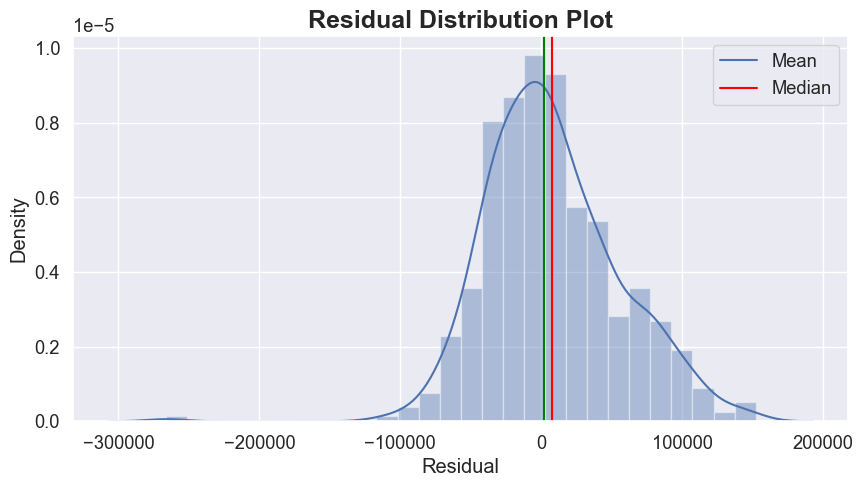

In [79]:
#gaussian distribution check
plt.figure(figsize=(10,5))
sns.distplot(residual)
plt.title('Residual Distribution Plot', size=18, weight='bold')
plt.xlabel('Residual')
plt.axvline(residual.mean(), color='red')
plt.axvline(residual.median(), color='green')
plt.legend(['Mean', 'Median'])
plt.show()

**Residual Plot**

Residual Plot adalah grafik yang digunakan dalam analisis regresi untuk memvisualisasikan residu, yaitu selisih antara nilai yang diamati dan nilai yang diprediksi oleh model regresi. Residual atau residu adalah sisa kesalahan prediksi yang tidak dijelaskan oleh model regresi. Residual Plot membantu dalam memeriksa apakah ada pola atau struktur tertentu dalam residu, sehingga memberikan wawasan tentang seberapa baik model regresi sesuai dengan data.

In [70]:
#create residual plot with plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=residual,
                    mode='markers',
                    name='Residual'))

# Add line at 0 residual
fig.add_trace(go.Scatter(x=y_test, y=[0]*len(y_test),
                    mode='lines',
                    name='Zero Residual'))

fig.update_layout(
    title='Residual Plot',
    xaxis_title='Actual',
    yaxis_title='Residual',
    autosize=False,
    height=500,
    width=700,
)
fig.show()

In [71]:
df_residual = pd.DataFrame(x_test)
df_residual['Actual_Sale_Price'] = y_test
df_residual['Predicted_Sale_Price'] = y_pred
df_residual['Residual'] = residual
df_residual['Percentage_Residual'] = round(np.absolute(df_residual['Residual'] / df_residual['Actual_Sale_Price'] * 100), 2)

In [72]:
b = df_residual[(df_residual['Residual'] < -110000) | (df_residual['Residual'] > 130000)]
b

Hallway_Type Time_To_Subway         Subway_Station  ETCFacilities_Nearby  \
3518     terraced    10min-15min  Kyungbuk_uni_hospital                     1   
4041     terraced         0-5min              Myung-duk                     5   
2653     terraced    10min-15min  Kyungbuk_uni_hospital                     1   
1180     terraced         0-5min  Kyungbuk_uni_hospital                     0   
1965     terraced         0-5min             Banwoldang                     0   
1530     terraced         0-5min             Banwoldang                     0   
2015     terraced         0-5min  Kyungbuk_uni_hospital                     0   
3966     terraced         0-5min  Kyungbuk_uni_hospital                     0   

      PublicOffice_Nearby  Basement_Parking  Size_Sqf  Actual_Sale_Price  \
3518                    5                 0      1377             343362   
4041                    7              1174       910              76991   
2653                    5                 0      1377             353982   
1180                    3              1270      1643             530973   
1965                    2               524      1394             407079   
1530                    4               605      1629             307079   
2015                    3              1270      1643             517699   
3966                    3              1270      1643             529203   

      Predicted_Sale_Price  Residual  Percentage_Residual  
3518              211061.5  132300.5                38.53  
4041              343362.0 -266371.0               345.98  
2653              211061.5  142920.5                40.38  
1180              387610.0  143363.0                27.00  
1965              254867.0  152212.0                37.39  
1530              419469.0 -112390.0                36.60  
2015              387610.0  130089.0                25.13  
3966              387610.0  141593.0                26.76

In [77]:
# show feature importance
feature_importance = best_model.named_steps['model'].feature_importances_
feature_importance = pd.DataFrame({'feature': x_train.columns, 'importance': feature_importance[:len(x_train.columns)]})
feature_importance.sort_values(by='importance', ascending=False, inplace=True)
feature_importance

feature  importance
1        Time_To_Subway    0.429386
0          Hallway_Type    0.020347
5      Basement_Parking    0.008779
3  ETCFacilities_Nearby    0.005647
6              Size_Sqf    0.000742
2        Subway_Station    0.000000
4   PublicOffice_Nearby    0.000000

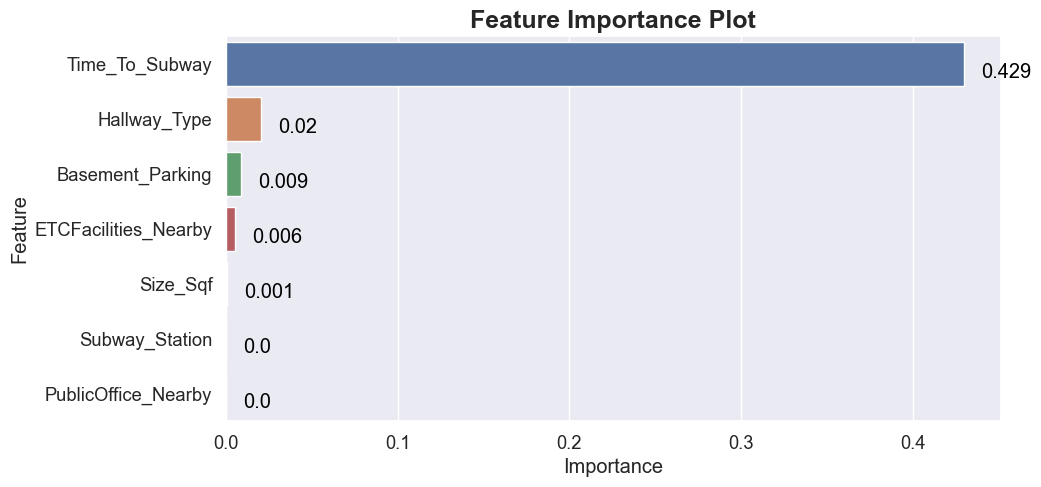

In [86]:
# Create a barplot of feature importance with seaborn
plt.figure(figsize=(10,5))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance Plot', size=18, weight='bold')
plt.xlabel('Importance')
plt.ylabel('Feature')

#add label into each bar
for i, v in enumerate(feature_importance['importance']):
    plt.text(v + 0.01, i + .25, str(round(v, 3)), color='black')

plt.show()


Berdasarkan tingkat kepentingan fitur terhadap model, feature yang paling berpengaruh terhadap harga apartment di Daegu adalah Time_To_Subway (Jarak Stasiun Terdekat), Hallway_Type (Tipe Apartemen), dan Basement_Parking (jumlah tempat parkir basement). Dengan menggunakan model final Decision Tree dan data feature yang berpengaruh, dapat membantu agen property dalam menentukan harga sewa apartment yang tepat di kota Daegu, Korea Selatan. Diharapkan pemanfaatan model berikut dapat meningkatkan tingkat kesuksesan untuk memasarkan dalam menyewakan unit apartment.


## 5. Conclusion

Berdasarkan proses pemodelan yang sudah dilakukan didapatkan beberapa kesimpulan sebagai berikut :
1. Model terbaik yang didapatkan pada proses modeling untuk dataset data_daegu_apartment yang dapat digunakan untuk memprediksi harga sewa apartment adalah model **Decision Tree**
2. Setelah dilakukan proses Hyperparameter Tuning dan Predict Test Set didapatkan bahwa model **Decision Tree** mempunyai performa yang lebih baik pada matriks MAPE & MAE dibandingkan pada model Random Forest
3. Berdasarkan model final (model Decision Tree), feature yang paling berpengaruh terhadap harga apartment di Daegu adalah Time_To_Subway (Jarak Stasiun Terdekat), Hallway_Type (Tipe Apartemen), dan Basement_Parking (jumlah tempat parkir basement). Dengan menggunakan model final Decision Tree dan data feature yang berpengaruh, dapat membantu agen property dalam menentukan harga sewa apartment yang tepat di kota Daegu, Korea Selatan. Diharapkan pemanfaatan model berikut dapat meningkatkan tingkat kesuksesan untuk memasarkan dalam menyewakan unit apartment.
4. Metrik evaluasi yang digunakan dalam model adalah MSLE, MAPE, MAE, MSE. Jika melihat nilai MAPE yang dihasilkan oleh model setelah dilakukan tuning hyperparameter, yaitu sebesar 0,186066%, maka dapat disimpulkan bahwa jika model ini digunakan untuk mengestimasi harga apartemen di Daegu pada rentang nilai yang telah dilatihkan pada model (harga maksimum 585840 won), maka estimasi rata-rata akan menyimpang kurang lebih sebesar 18,6066% dari harga sebenarnya.

MAPE Interpretation I
|MAPE | Rating |
|---|---|
< 10 %	|Very good
10 % - 20 %	|Good
20 % - 50 %|	OK
|> 50 % |	Not good|

* [**Sumber 1 : What is a good MAPE score?**](https://stephenallwright.com/good-mape-score/)

5. Akan tetap ada kemungkinan harga akan meleset dari perkiraan karena adanya tingkat bias yang masih cukup tinggi antara harga aktual dan prediksi. Untuk mengatasi hal ini, kita dapat memperluas jumlah fitur yang akan lebih mendalam dalam menjelaskan faktor-faktor yang mempengaruhi harga.
6. Sebelum dibuatnya sebuah model regresi, kita hanya memiliki data mentah tentang karakteristik apartment dan harga apartment di Daegu yang sulit diintrepretasikan dan tidak memberikan wawasan yang berguna tentang hubungan antara karakteristik apartment dan harga apartment. Dengan hadirnya model regresi, kita dapat melakukan analisis lebih mendalam dan memperoleh pemahaman yang lebih baik tentang korelasi antara karakteristik apartment dan harga apartment. Selain itu, model regresi juga memungkinkan kita untuk melakukan prediksi perubahan nilai harga apartment yang mungkin terjadi jika karakteristik apartment mengalami perubahan. Dalam hal ini, dampak setelah penggunaan model regresi menjadi lebih signifikan karena agen real estate dapat membuat keputusan yang lebih tepat berdasarkan hasil analisis model regresi dan dengan demikian dapat menentukan harga apartment yang sesuai.
7. Dalam dunia bisnis properti dalam hal ini sewa apartment, harga sewa apartemen tidak hanya ditentukan oleh faktor-faktor nyata seperti lokasi, tahun pembuatan, luas apartment, fasilitas, ataupun akses transportasi, namun terkadang juga dipengaruhi faktor-faktor seperti urgensi untuk menempati suatu apartment tersebut, hal dapat menyebabkan variasi harga di bawah atau bahkan di atas rata-rata pasar. Selain itu, terkadang harga yang tidak masuk akal juga dapat muncul karena kurangnya pengetahuan. Mengingat kompleksitas ini, menentukan harga yang tepat untuk apartemen menjadi tantangan. Meskipun alat prediksi harga yang sempurna sulit diwujudkan, model yang ada dapat menjadi solusi yang baik. Model tersebut memiliki MAPE sebesar 18.60%. Artinya, model ini memiliki peluang maksimal untuk menyimpang sekitar 18.60% dari harga sebenarnya. Meskipun angka ini dapat dibilang baik dalam kerangka analisis data, penting untuk diingat bahwa pasar apartemen memiliki variasi harga yang luas bahkan untuk unit dengan spesifikasi yang sama. Namun, model ini tetap dianggap cukup dapat diandalkan dalam mengestimasi harga.

## 6. Recommendation

Berikut terdapat beberapa rekomendasi yang dapat diberikan:

1. Mengambil pertimbangan untuk menambah feature yang memiliki korelasi yang lebih signifikan terhadap harga apartemen di Daegu, Korea Selatan, seperti jumlah personel keamanan yang ditempatkan di apartment, informasi inklusivitas furniture, lantai berapa tempat apartemen berada, tahun penjualan unit apartemen, jumlah ruangan yang terdapat di dalam unit (termasuk jumlah kamar tidur, kamar mandi, dan dapur) dan variabel-variabel lain yang memiliki dampak langsung terhadap harga.
2. Melakukan ekspansi dataset dengan mengumpulkan data yang lebih mutakhir dan informatif terkait harga apartemen di Daegu, Korea Selatan, bertujuan untuk meningkatkan kedekatan dataset saat merancang model prediksi. Dengan demikian, diharapkan model regresi dapat memahami lebih baik pola-pola dalam data, yang pada akhirnya dapat menghasilkan peningkatan akurasi prediksi.
3. Mengaplikasikan model machine learning yang lebih canggih guna membangun prediksi harga apartemen. Meskipun model yang lebih kompleks dapat memberikan hasil yang lebih akurat, perlu diperhatikan bahwa kompleksitasnya juga dapat menghambat pemahaman terhadap model yang dihasilkan.
4. Memperhitungkan variabel eksternal yang secara keseluruhan memiliki potensi untuk memengaruhi harga jual apartemen di Daegu, Korea Selatan, termasuk namun tidak terbatas pada faktor-faktor seperti ketersediaan kredit dalam sewa apartment, tingkat suku bunga, Indeks Harga Konsumen (IHK), performa Produk Domestik Bruto (PDB) setiap tahunnya, dan faktor lain yang relevan.